# Big Mart Sales Analysis

# Business Case: Optimizing Sales Performance and Inventory Management

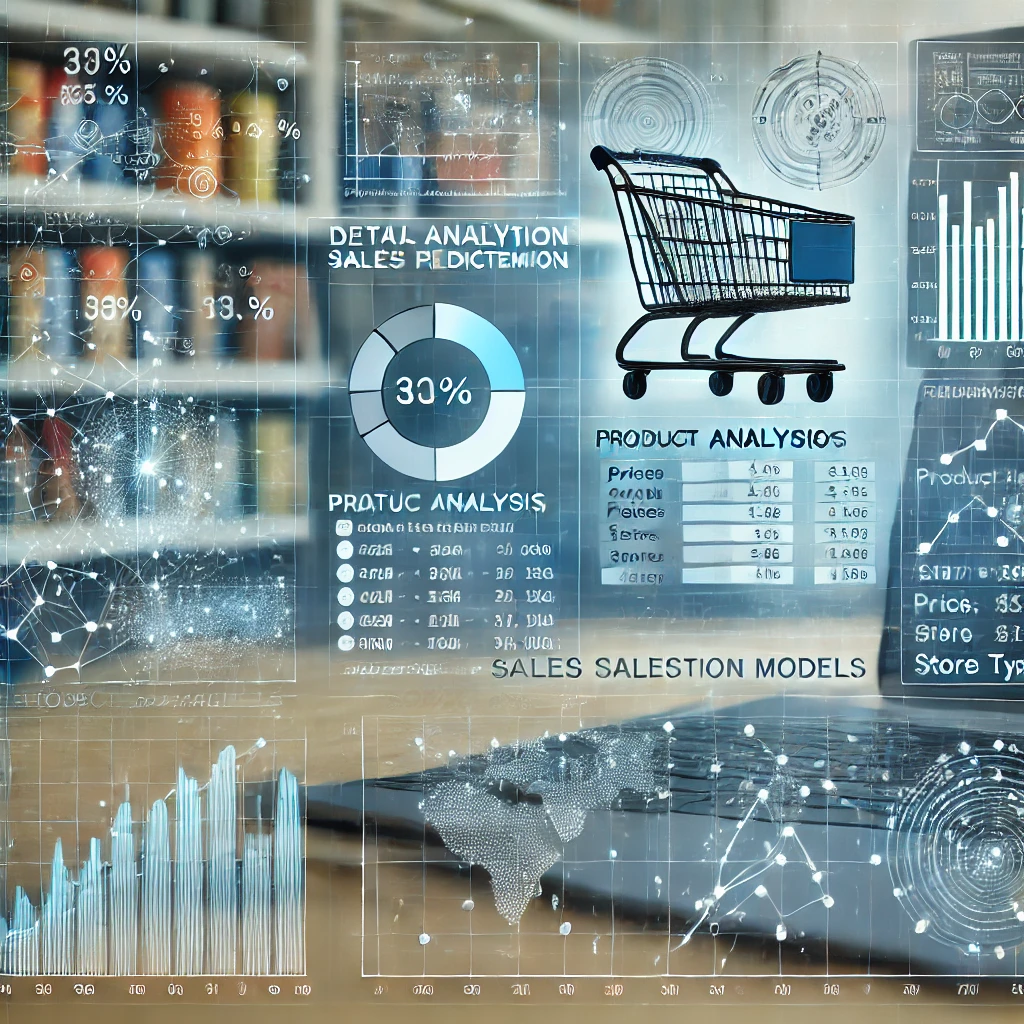

# Domain Analysis:

### Introduction Of Dataset :-


* **Item_Identifier** ---- Unique product ID
* **Item_Weight** ---- Weight of product
* **Item_Fat_Content** ---- Whether the product is low fat or not
* **Item_Visibility** ---- The % of the total display area of all products in a store allocated to the particular product
* **Item_Type** ---- The category to which the product belongs
* **Item_MRP** ---- Maximum Retail Price (list price) of the product
* **Outlet_Identifier** ---- Unique store ID
* **Outlet_Establishment_Year** ---- The year in which the store was established
* **Outlet_Size** ---- The size of the store in terms of ground area covered
* **Outlet_Location_Type** ---- The type of city in which the store is located
* **Outlet_Type** ---- Whether the outlet is just a grocery store or some sort of supermarket
* **Item_Outlet_Sales** ---- sales of the product in t particular store. This is the outcome variable to be predicted.

## IMPORT NECESSARY LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
 
import xgboost as xgb 
import lightgbm as lgb 
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPRegressor  



# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

### LOADING DATA

In [2]:
Big_Mart_df = pd.read_csv(r"C:\Users\GANESH AHIRE\Documents\Projects\project\big_mart\train.csv")
#Sub_Big_Mart_df = pd.read_csv(r"C:\Users\GANESH AHIRE\Documents\Projects\project\big_mart\train.csv")
Big_Mart_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

### BASIC CHECKS

In [3]:
Big_Mart_df.sample(5).T

5884               7302  \
Item_Identifier                        FDR25              FDX58   
Item_Weight                             17.0                NaN   
Item_Fat_Content                     Regular            Low Fat   
Item_Visibility                     0.139522           0.043552   
Item_Type                             Canned        Snack Foods   
Item_MRP                            266.8884            184.495   
Outlet_Identifier                     OUT046             OUT027   
Outlet_Establishment_Year               1997               1985   
Outlet_Size                            Small             Medium   
Outlet_Location_Type                  Tier 1             Tier 3   
Outlet_Type                Supermarket Type1  Supermarket Type3   
Item_Outlet_Sales                  5034.7796           7873.085   

                                            5283                3644  \
Item_Identifier                            FDP44               NCW41   
Item_Weight                                 16.5                18.0   
Item_Fat_Content                         Regular             Low Fat   
Item_Visibility                         0.079699            0.015482   
Item_Type                  Fruits and Vegetables  Health and Hygiene   
Item_MRP                                100.6332            159.3604   
Outlet_Identifier                         OUT035              OUT045   
Outlet_Establishment_Year                   2004                2002   
Outlet_Size                                Small                 NaN   
Outlet_Location_Type                      Tier 2              Tier 2   
Outlet_Type                    Supermarket Type1   Supermarket Type1   
Item_Outlet_Sales                       1537.998           2059.9852   

                                        5002  
Item_Identifier                        FDQ52  
Item_Weight                             17.0  
Item_Fat_Content                     Low Fat  
Item_Visibility                     0.119571  
Item_Type                       Frozen Foods  
Item_MRP                            249.7434  
Outlet_Identifier                     OUT049  
Outlet_Establishment_Year               1999  
Outlet_Size                           Medium  
Outlet_Location_Type                  Tier 1  
Outlet_Type                Supermarket Type1  
Item_Outlet_Sales                  4221.8378

In [4]:
#Find shape of the data
Big_Mart_df.shape

(8523, 12)

In [5]:
Big_Mart_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
Big_Mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* **Dataset has 8523 records and 10 features.**


**Categorical Features:**
* Item_Identifier
* Item_Fat_Content
* Item_Type 
* Outlet_Identifier 
* Outlet_Size
* Outlet_Location_Type 
* Outlet_Type

### STATISTICAL MEASURES OF DATA

In [7]:
#Extracting information about a Continous data
Big_Mart_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

* Item_Visibility: The minimum value is 0, which might indicate missing data encoded as zeros.
* Item_Outlet_Sales: The high standard deviation and range (33.29 to 13,086.96) suggest potential outliers.
* Features like Item_Visibility, Item_MRP, and Item_Weight have varying scales.


In [8]:
#Extracting information about a Catgorical data
Big_Mart_df.describe(include="O")

Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                5                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                10             5089                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        6113                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        2793                 3350               5577

* Columns such as Item_Identifier, Item_Fat_Content, Item_Type, and others need proper encoding.
* Item_Fat_Content may have inconsistencies like "Low Fat" vs. "low fat" and "Regular."

## EDA:
### Univariate Analysis :-

In [9]:
import sweetviz as sv
my_report = sv.analyze(Big_Mart_df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


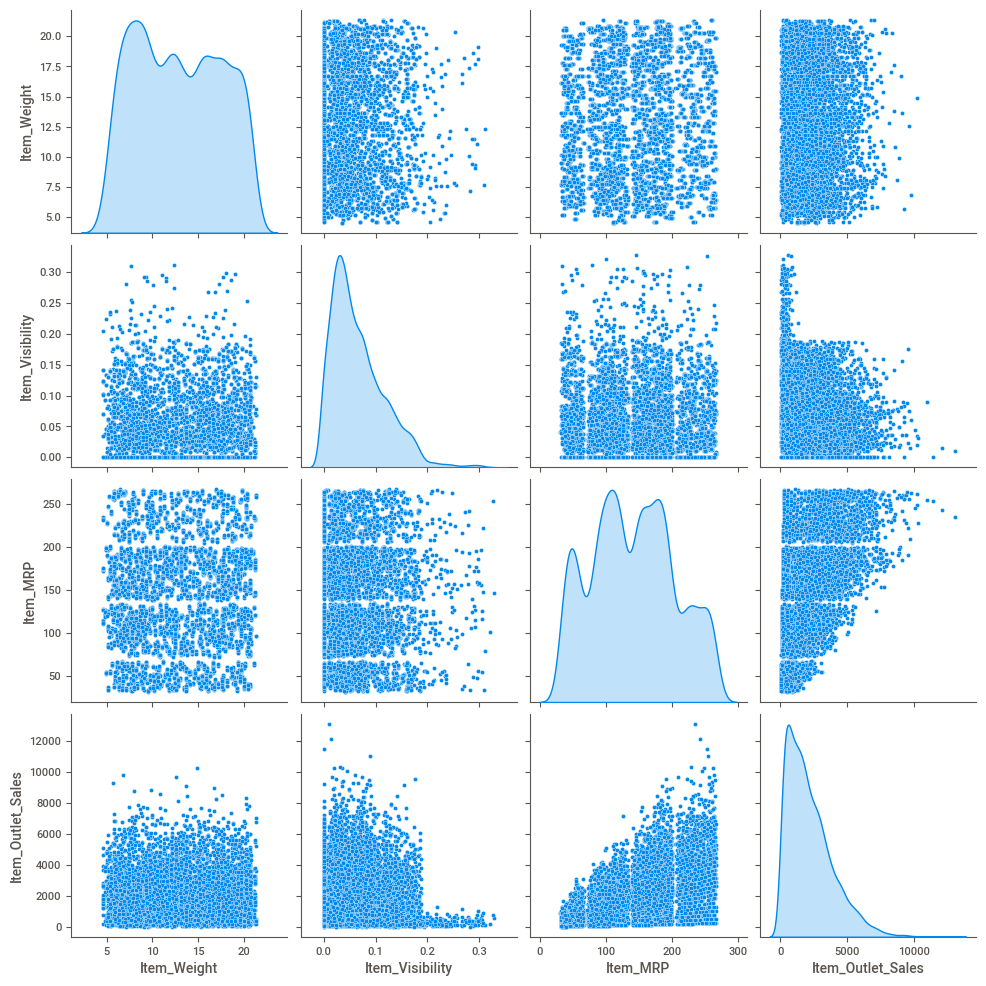

In [10]:
 # Load dataset (ensure it's preprocessed)
#df = pd.read_csv("train.csv")

# Select relevant numerical features for the pairplot
numerical_features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]

# Create the pairplot
sns.pairplot(Big_Mart_df[numerical_features], diag_kind="kde")  # kde gives smoothed histograms
plt.show()


**1. tem_Weight vs Other Features**
* Appears to be multimodal with peaks at different weight ranges.
* No clear correlation with Item_Visibility, Item_MRP, or Item_Outlet_Sales.
* Item_Weight may not have a strong impact on sales.

**2. Item_Visibility vs Other Features**
* Highly skewed, with many values near 0.
* Item_Visibility vs Item_Outlet_Sales:
    * Some data points have 0 visibility, which is unrealistic.
    * Sales seem scattered across different visibility levels, indicating weak correlation.
    * Replace 0 values in Item_Visibility with the mean or median of similar items.
    
**3. Item_MRP vs Item_Outlet_Sales**
* Strong Positive Correlation: Higher MRP (Maximum Retail Price) leads to higher sales.
* Clear Upward Trend: Indicates that Item_MRP is a key predictor of sales.
* Item_MRP is one of the most important features in predicting sales.

**4. Item_Outlet_Sales (Target Variable)**
* Right-Skewed Distribution: Sales values are not normally distributed.
* Possible Outliers: Few items have extremely high sales.
* Apply log transformation to make the target variable distribution more normal.
* Log transformation can help models better capture patterns in sales.

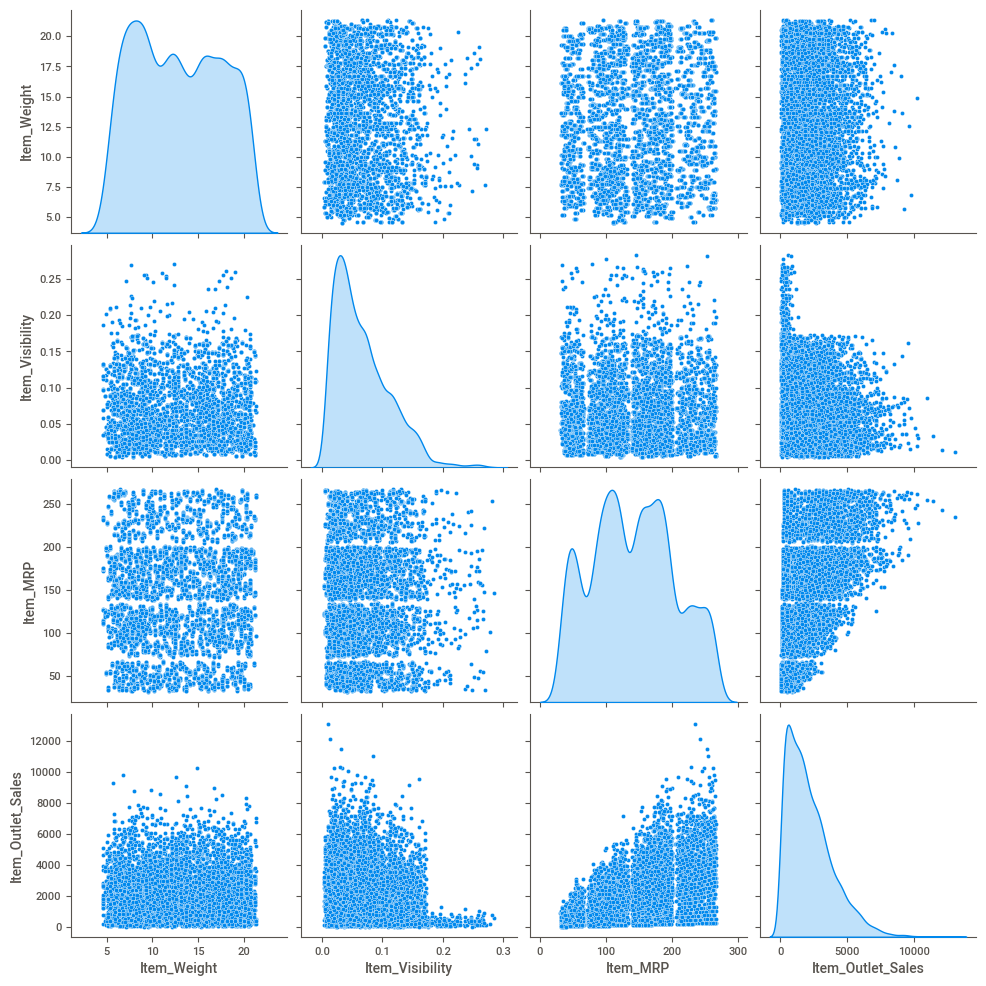

In [11]:
# Compute mean visibility per product category
visibility_mean = Big_Mart_df.groupby("Item_Identifier")["Item_Visibility"].transform("mean")

# Replace only the 0 values with the mean visibility
Big_Mart_df.loc[Big_Mart_df["Item_Visibility"] == 0, "Item_Visibility"] = visibility_mean

# Apply log transformation to normalize the distribution
Big_Mart_df["Item_Visibility"] = np.log1p(Big_Mart_df["Item_Visibility"])

# The pairplot
sns.pairplot(Big_Mart_df[numerical_features], diag_kind="kde")  # kde gives smoothed histograms
plt.show()

* Replace 0 values with the mean per Item_Identifier and apply log transformation to reduce skewness.
* Apply log transformation and replace 0 values.

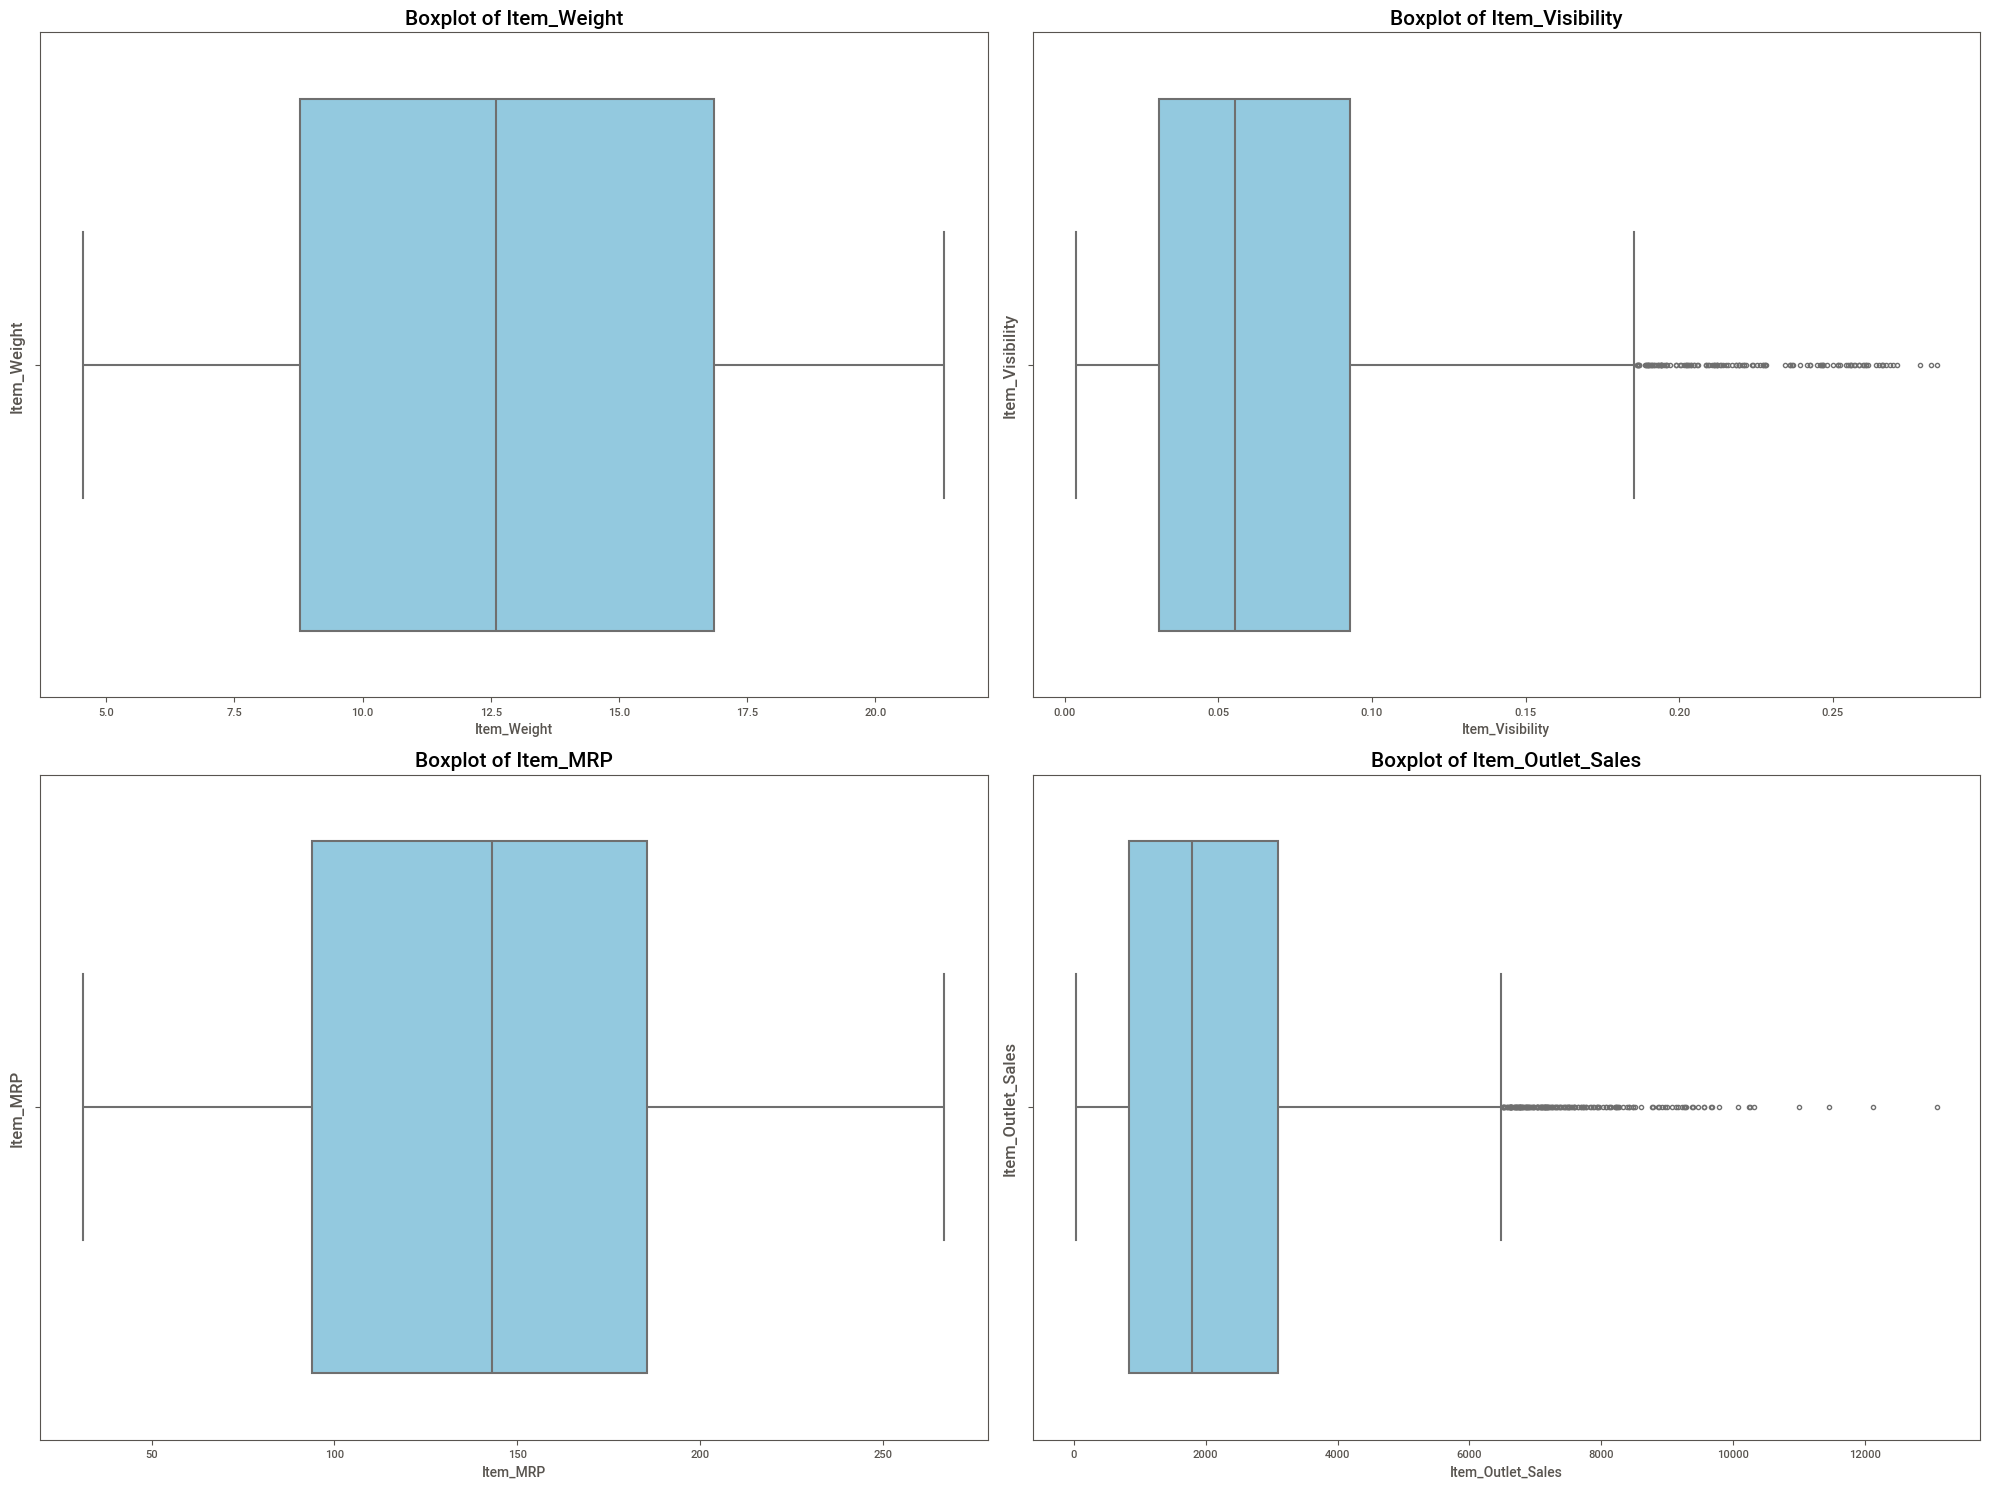

In [12]:
# Boxplot Function
def boxplot(df, continuous):
    plt.figure(figsize=(20, 15))  # Define canvas size
    plotno = 1  # Counter
    for column in continuous:
        if plotno <= 8:  # Ensure no extra plots
            plt.subplot(2, 2, plotno)  # plotting 4 graphs (2-rows,2-columns) ,plotnumber is for count
            sns.boxplot(x=column, data=df, color='skyblue', linewidth=1.5)
            plt.title(f'Boxplot of {column}', fontsize=15)
            plt.ylabel(column, fontsize=12)
        plotno += 1
    plt.tight_layout()
    plt.show()

# List of continuous variables
continuous = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Call the function
boxplot(Big_Mart_df, continuous)


In [13]:
def pie_plot(columns,df):
    num_columns = 2
    num_rows = 3

    fig,axes = plt.subplots(num_rows,num_columns,figsize=(14,12))
    axes = axes.flatten()
    for i,column in enumerate(columns):
        counts = df[column].value_counts()
        palette = sns.color_palette('viridis',df[column].nunique())

        axes[i].pie(counts.values,labels=counts.index,autopct='%.2f%%',colors=palette)
        axes[i].set_title(f'{column} Distribution',fontsize=20,fontweight='bold')

    for j in range(len(columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [14]:
df_cp =  Big_Mart_df.copy()
item_counts = df_cp['Item_Type'].value_counts()

def categorize_item_type(item_type):
    if item_counts[item_type] < 445:
        return 'Others'
    return item_type

df_cp['Item_Type'] = df_cp['Item_Type'].apply(categorize_item_type)
df_cp['Item_Type'].value_counts()

Item_Type
Others                   1381
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Name: count, dtype: int64

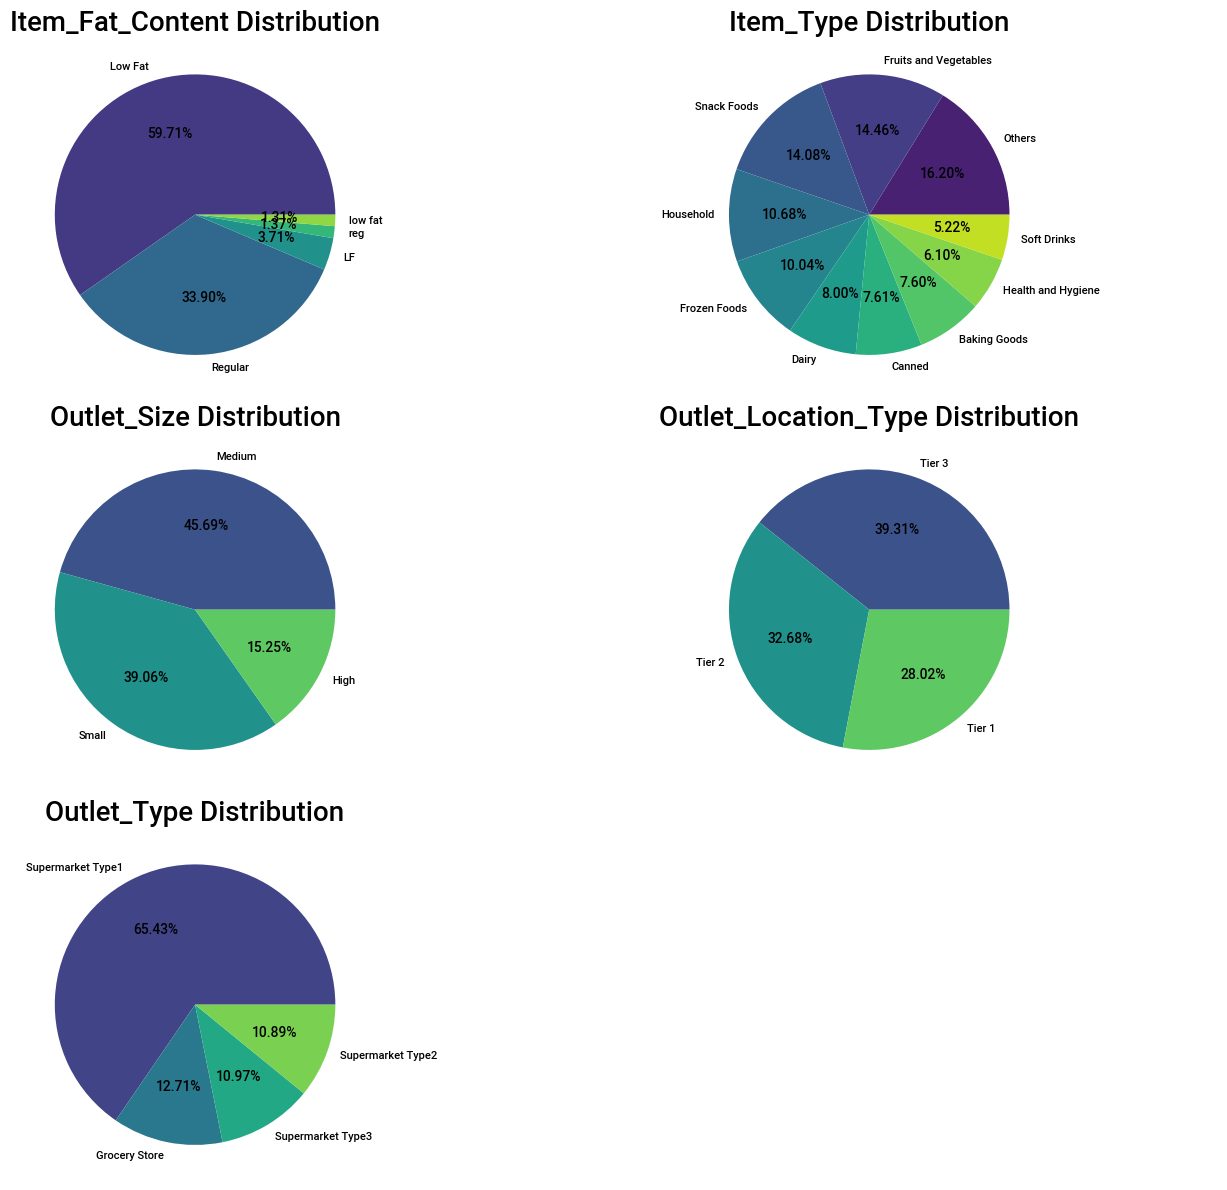

In [15]:
cat_columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
pie_plot(cat_columns,df_cp)

### Bivariate Analysis

#### Item MRP (Maximum Retail Price) vs. Sales

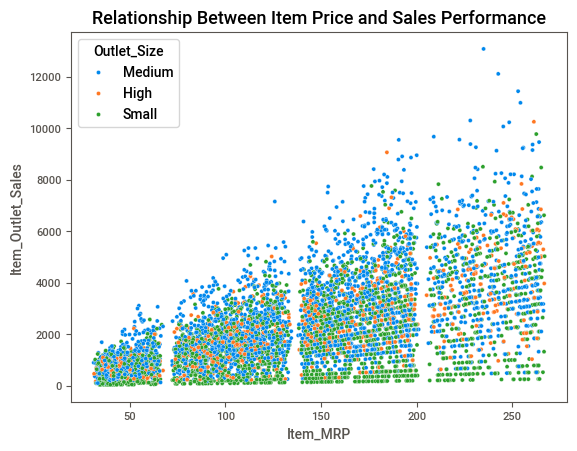

In [16]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Outlet_Size',data=Big_Mart_df)

plt.title('Relationship Between Item Price and Sales Performance',fontsize=13,fontweight='bold')
plt.show()

**Item_MRP vs Item_Outlet_Sales**
* Strong Positive Correlation: Higher MRP (Maximum Retail Price) leads to higher sales.
* Clear Upward Trend: Indicates that Item_MRP is a key predictor of sales.
* Item_MRP is one of the most important features in predicting sales.


#### Outlet Type vs. Sales

In [17]:
type_sales = Big_Mart_df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()
type_sales

Outlet_Type  Item_Outlet_Sales
0  Supermarket Type3        3694.038558
1  Supermarket Type1        2316.181148
2  Supermarket Type2        1995.498739
3      Grocery Store         339.828500

Text(0.5, 1.0, 'Outlet Type vs. Sales')

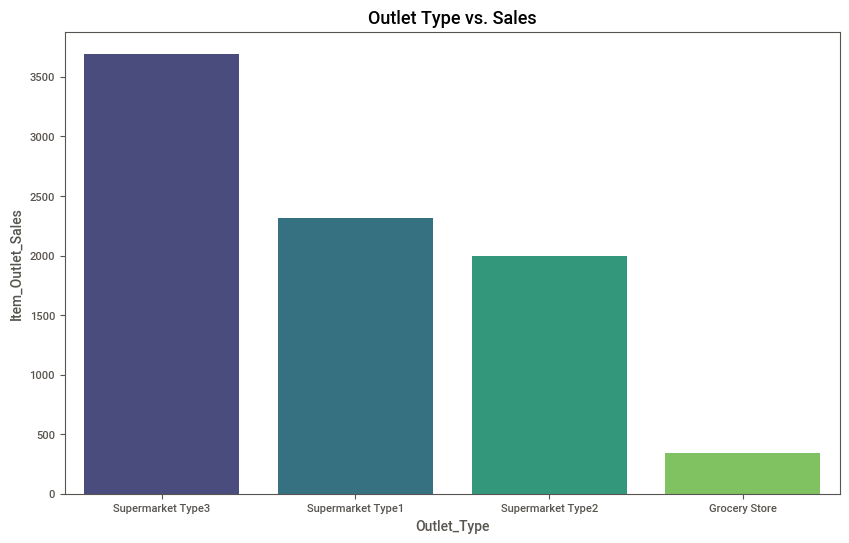

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=type_sales,palette='viridis')
plt.title('Outlet Type vs. Sales',fontsize=13,fontweight='bold')

#### Outlet Location vs. Sales

In [19]:
location_sales = Big_Mart_df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().reset_index().sort_values(by='Outlet_Location_Type')
location_sales

Outlet_Location_Type  Item_Outlet_Sales
0               Tier 1        1876.909159
1               Tier 2        2323.990559
2               Tier 3        2279.627651

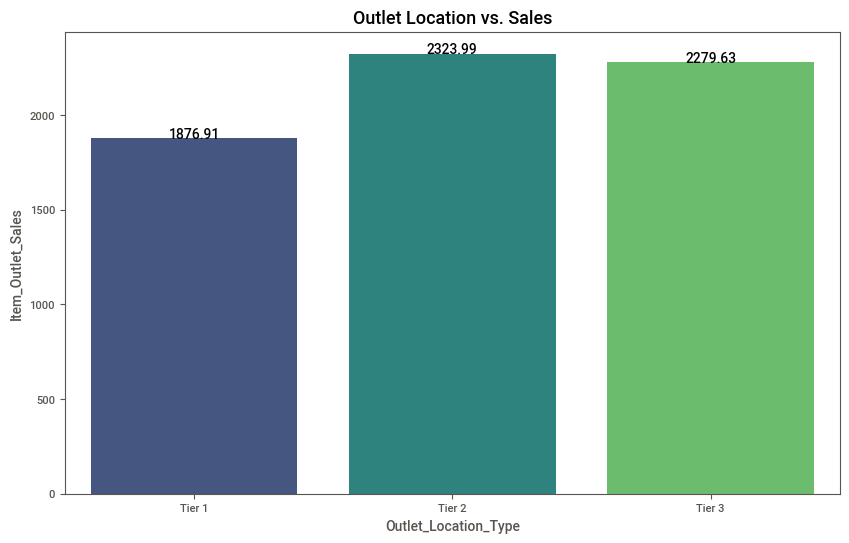

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=location_sales,palette='viridis')
plt.title('Outlet Location vs. Sales',fontsize=13,fontweight='bold')

for index, value in enumerate(location_sales['Item_Outlet_Sales']):
    plt.text(index, value + 0.02, round(value, 2), ha="center")

#### Outlet Size vs. Sales

In [21]:
size_sales = Big_Mart_df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index()
size_sales

Outlet_Size  Item_Outlet_Sales
0        High        2298.995256
1      Medium        2681.603542
2       Small        1912.149161

Text(0.5, 1.0, 'Outlet_Size')

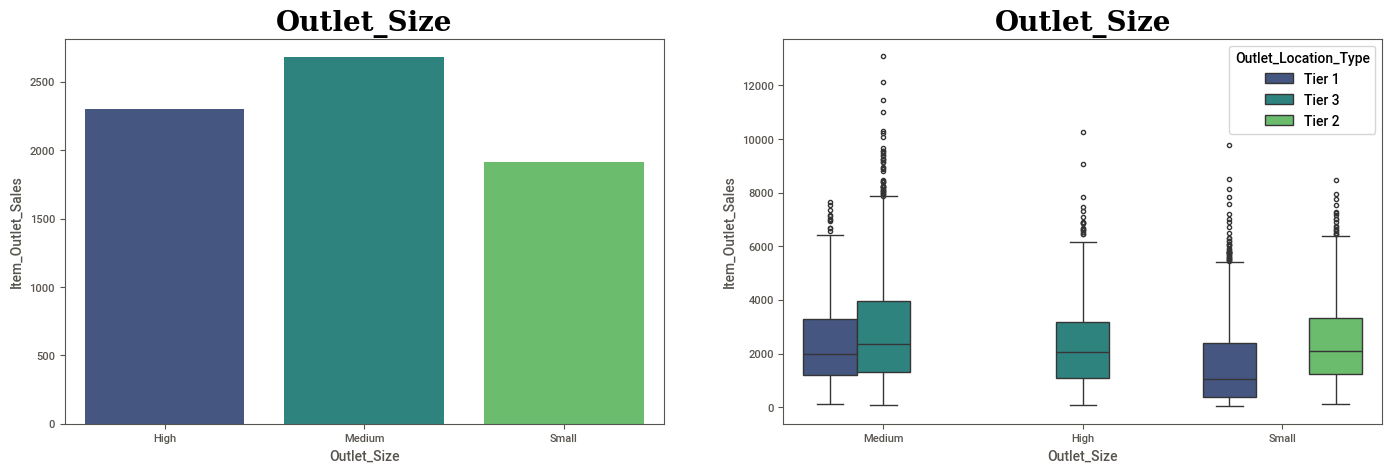

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (17, 5))

sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=size_sales,ax=ax[0],palette='viridis')
ax[0].set_title('Outlet_Size', fontweight = 'bold', fontfamily='serif', fontsize=20)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=Big_Mart_df,ax=ax[1],palette='viridis')
ax[1].set_title('Outlet_Size', fontweight = 'bold', fontfamily='serif', fontsize=20)

#### Item Fat Content vs. Sales

In [23]:
fat_sales = Big_Mart_df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().reset_index()
fat_sales

Item_Fat_Content  Item_Outlet_Sales
0               LF        2073.551928
1          Low Fat        2164.477336
2          Regular        2235.186702
3          low fat        2087.740737
4              reg        1962.192268

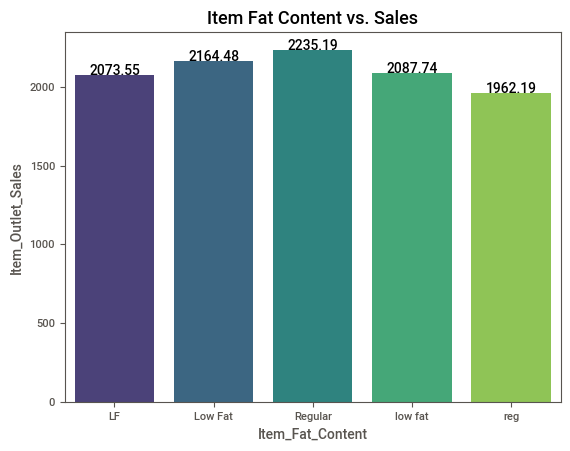

In [24]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=fat_sales,palette='viridis')
plt.title('Item Fat Content vs. Sales',fontsize=13,fontweight='bold')

for index, value in enumerate(fat_sales['Item_Outlet_Sales']):
    plt.text(index, value + 0.02, round(value, 2), ha="center")

#### Item Type vs. Sales

In [25]:
item_type = Big_Mart_df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()
item_type

Item_Type  Item_Outlet_Sales
0           Starchy Foods        2374.332773
1                 Seafood        2326.065928
2   Fruits and Vegetables        2289.009592
3             Snack Foods        2277.321739
4               Household        2258.784300
5                   Dairy        2232.542597
6                  Canned        2225.194904
7                  Breads        2204.132226
8                    Meat        2158.977911
9             Hard Drinks        2139.221622
10           Frozen Foods        2132.867744
11              Breakfast        2111.808651
12     Health and Hygiene        2010.000265
13            Soft Drinks        2006.511735
14           Baking Goods        1952.971207
15                 Others        1926.139702

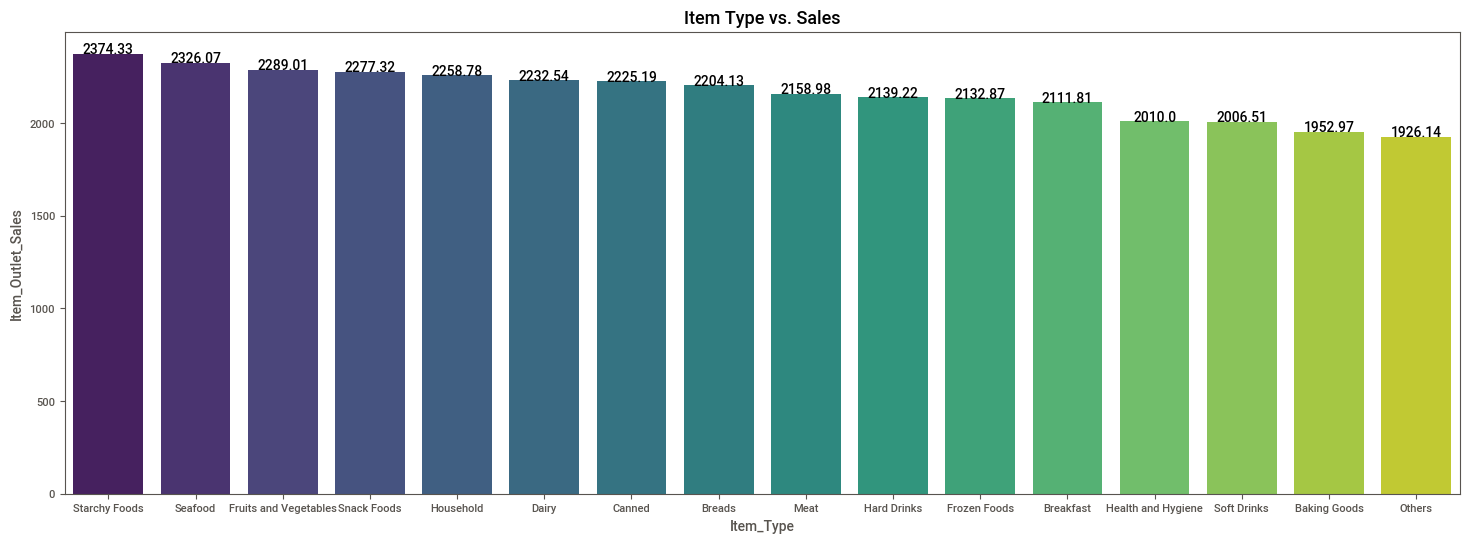

In [26]:
plt.figure(figsize=(18,6))

sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=item_type,palette='viridis')
plt.title('Item Type vs. Sales',fontsize=13,fontweight='bold')

for index, value in enumerate(item_type['Item_Outlet_Sales']):
    plt.text(index, value + 0.02, round(value, 2), ha="center")

plt.show()

#### Outlet Establishment Year vs. Sales

In [27]:
year_sales = Big_Mart_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()
year_sales

Outlet_Establishment_Year  Item_Outlet_Sales
0                       1985        2483.677474
1                       2004        2438.841866
2                       1999        2348.354635
3                       2007        2340.675263
4                       1987        2298.995256
5                       1997        2277.844267
6                       2002        2192.384798
7                       2009        1995.498739
8                       1998         339.351662

Text(0.5, 1.0, 'Outlet Establishment Year vs. Sales')

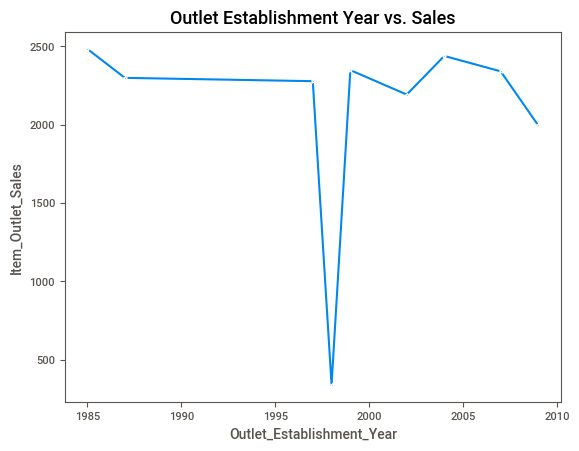

In [28]:
sns.lineplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=year_sales,marker='*')
plt.title('Outlet Establishment Year vs. Sales',fontsize=13,fontweight='bold')

# DATA PREPROCESSING / FEATURE ENGINEERING :-

## 1. Check Missing Value :-


In [29]:
Big_Mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
# Create function to check missing value with percentage
def missing_value(Data):
    null_value = Big_Mart_df.isnull().sum()
    percentage = (Big_Mart_df.isnull().sum()/Big_Mart_df.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing_Number','Missing_Percentage'])
    return null_value
missing_value(Big_Mart_df)

Missing_Number  Missing_Percentage
Item_Identifier                         0            0.000000
Item_Weight                          1463           17.165317
Item_Fat_Content                        0            0.000000
Item_Visibility                         0            0.000000
Item_Type                               0            0.000000
Item_MRP                                0            0.000000
Outlet_Identifier                       0            0.000000
Outlet_Establishment_Year               0            0.000000
Outlet_Size                          2410           28.276428
Outlet_Location_Type                    0            0.000000
Outlet_Type                             0            0.000000
Item_Outlet_Sales                       0            0.000000

**Missing Values:-**
* Item_Weight: Missing values in 1463 rows (~17% of data).
* Outlet_Size: Missing values in 2410 rows (~28% of data).

## 2. Impute Missing Value :-


1. Item_Weight :-

In [31]:
Big_Mart_df["Item_Identifier"].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [32]:
Big_Mart_df['Item_Identifier'] = Big_Mart_df['Item_Identifier'].apply(lambda x: x[:2])

In [33]:
Big_Mart_df["Item_Identifier"].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [34]:
Big_Mart_df["Item_Weight"].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [35]:
#For Item_Weight, use the mean or median of Item_Weight grouped by Item_Type for imputation:
Big_Mart_df['Item_Weight'] = Big_Mart_df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [36]:
Big_Mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

2. Outlet_Size :-

In [37]:
Big_Mart_df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

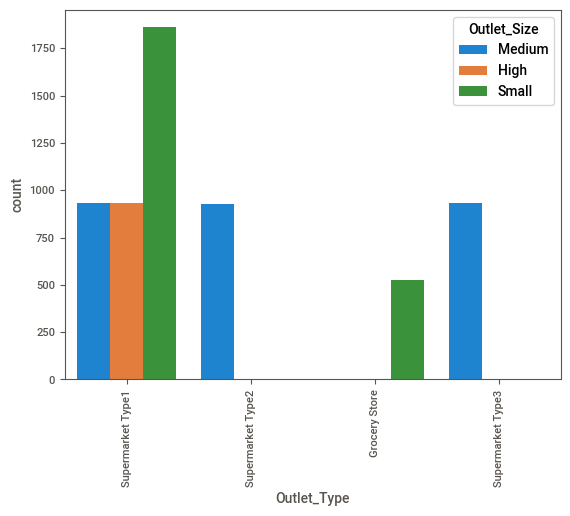

In [38]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE
sns.countplot(data = Big_Mart_df, x = "Outlet_Type",hue = "Outlet_Size")
plt.xticks(rotation =90)

In [39]:
# Calculate the mode for each 'Outlet_Type'
mode_of_outlet_size = Big_Mart_df.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode()[0]
)

# Verify the pivot_table result
print(mode_of_outlet_size)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [40]:
# For Outlet_Size, impute missing values using the mode based on Outlet_Type:
Big_Mart_df['Outlet_Size'] = Big_Mart_df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))


In [41]:
Big_Mart_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 3. Outlier  Handling :-
* Outliers are extreme values that deviate significantly from the majority of the data. Features with a large range compared to their interquartile range (IQR) often have outliers.

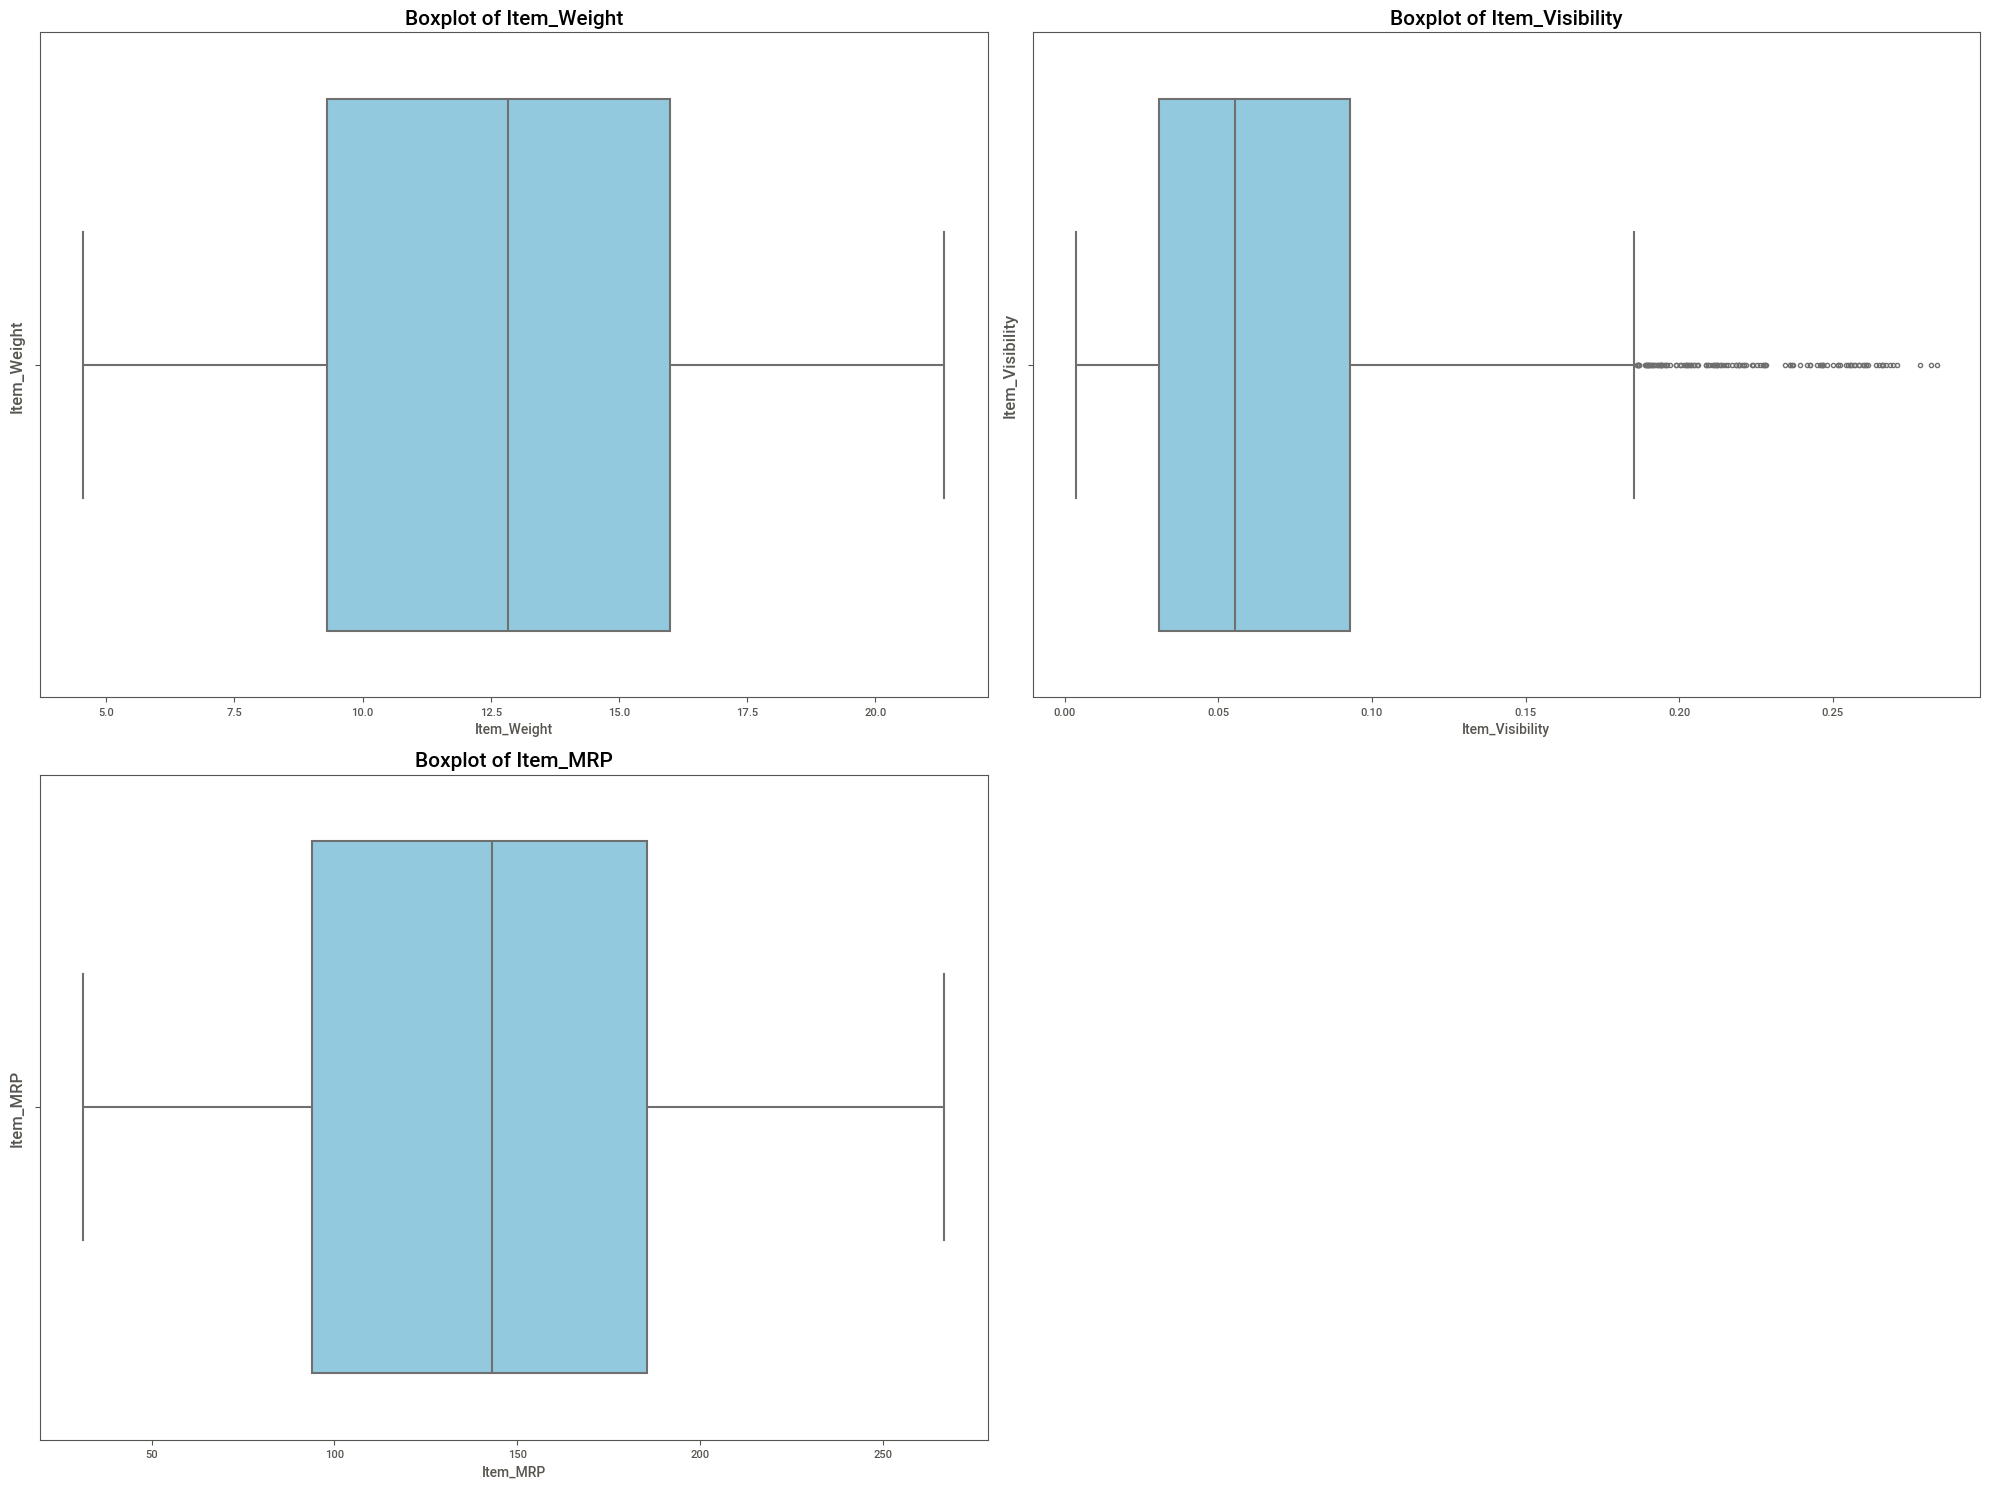

In [42]:
# Boxplot Function
def boxplot(df, continuous):
    plt.figure(figsize=(20, 15))  # Define canvas size
    plotno = 1  # Counter
    for column in continuous:
        if plotno <= 8:  # Ensure no extra plots
            plt.subplot(2, 2, plotno)  # plotting 4 graphs (2-rows,2-columns) ,plotnumber is for count
            sns.boxplot(x=column, data=df, color='skyblue', linewidth=1.5)
            plt.title(f'Boxplot of {column}', fontsize=15)
            plt.ylabel(column, fontsize=12)
        plotno += 1
    plt.tight_layout()
    plt.show()

# List of continuous variables
continuous = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Call the function
boxplot(Big_Mart_df, continuous)


**Features Likely to Have Outliers**
1. Item_Visibility:
    * Minimum value is 0 (implying missing or erroneous values).
    * Contains extreme values beyond 75th percentile (0.094).

In [43]:
from scipy import stats
IQR = stats.iqr(Big_Mart_df.Item_Visibility,interpolation = 'midpoint')
IQR

0.06208529182164777

In [44]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = Big_Mart_df.Item_Visibility.quantile(0.25)
# Third quartile (Q3) 
Q3 =Big_Mart_df.Item_Visibility.quantile(0.75)
##getting the limits
min_limit= Q1 - 1.5*IQR
print('Minimum limit',min_limit)
max_limit= Q3 +1.5*IQR
print('Maximum limit',max_limit)

Minimum limit -0.06248781547521743
Maximum limit 0.18585335181137366


In [45]:
len(Big_Mart_df.loc[Big_Mart_df['Item_Visibility'] > max_limit])/18278*100

0.7167086114454536

In [46]:
# Filter or cap extreme outliers
Big_Mart_df['Item_Visibility'] = Big_Mart_df['Item_Visibility'].clip(lower=min_limit, upper=max_limit)

<Axes: xlabel='Item_Visibility'>

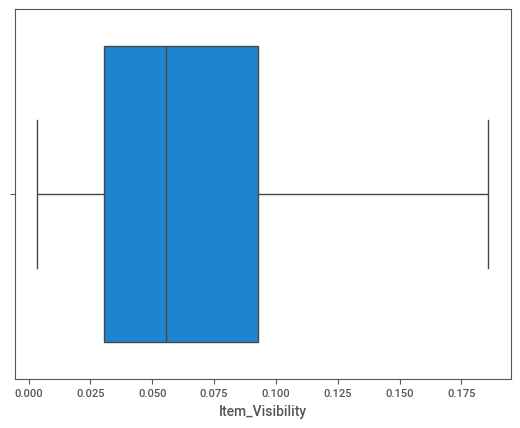

In [47]:
sns.boxplot(x = Big_Mart_df.Item_Visibility)

## 4. Handling Categorical Data :-


* dataset has categorical variables (Item_Fat_Content, Item_Type, Outlet_Size, etc.) that need to be converted into numerical formats for machine learning models.
* The Item_Fat_Content column contains various representations of the same categories which can lead to inconsistencies in data analysis like "Low Fat" vs. "low fat" and "Regular.

**Categorical Features:**
* Item_Identifier
* Item_Fat_Content
* Item_Type 
* Outlet_Identifier 
* Outlet_Size
* Outlet_Location_Type 
* Outlet_Type

1. Item_Identifier

In [48]:
Big_Mart_df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [49]:
Big_Mart_df.Item_Identifier.unique()#checking unique value in Item_Identifier column

array(['FD', 'DR', 'NC'], dtype=object)

In [50]:
Big_Mart_df.Item_Identifier=Big_Mart_df.Item_Identifier.map({'FD':2,'NC':1,'DR':0})
Big_Mart_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0                2         9.30          Low Fat         0.015920   
1                0         5.92          Regular         0.019095   
2                2        17.50          Low Fat         0.016621   
3                2        19.20          Regular         0.015158   
4                1         8.93          Low Fat         0.008050   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

2. Item_Fat_Content :-

In [51]:
Big_Mart_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [52]:
# Encode Categorical Variables
# Standardize categories in Item_Fat_Content
Big_Mart_df['Item_Fat_Content'] = Big_Mart_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [53]:
Big_Mart_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

* manual encoding is best technique to handle categorical feature and Lots of Labels available with the help of map function.

In [54]:
Big_Mart_df.Item_Fat_Content = Big_Mart_df.Item_Fat_Content.map({'Regular':1,'Low Fat':0})

In [55]:
Big_Mart_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

3. Item_Type :-

In [56]:
Big_Mart_df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [57]:
Big_Mart_df.Item_Type = Big_Mart_df.Item_Type.map({'Fruits and Vegetables':15,'Snack Foods':14,'Household':13,'Frozen Foods':12,
                                            'Dairy':11,'Canned':10,'Baking Goods':9,'Health and Hygiene':8,'Soft Drinks':7,'Meat':6,'Breads':5,'Hard Drinks':4,
                                            'Others':3,'Starchy Foods':2,'Breakfast':1,'Seafood':0})



In [58]:
Big_Mart_df['Item_Type'].value_counts()

Item_Type
15    1232
14    1200
13     910
12     856
11     682
10     649
9      648
8      520
7      445
6      425
5      251
4      214
3      169
2      148
1      110
0       64
Name: count, dtype: int64

4. Outlet_Identifier:-

In [59]:
Big_Mart_df["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [60]:
Big_Mart_df.Outlet_Identifier = Big_Mart_df.Outlet_Identifier.map({'OUT027':9,'OUT013':8,'OUT049':7,'OUT046':6,'OUT035':5,'OUT045':4,
                                            'OUT018':3,'OUT017':2,'OUT010':1,'OUT019':0})

In [61]:
Big_Mart_df["Outlet_Identifier"].value_counts()

Outlet_Identifier
9    935
8    932
7    930
6    930
5    930
4    929
3    928
2    926
1    555
0    528
Name: count, dtype: int64

5. Outlet_Size :-

In [62]:
Big_Mart_df['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [63]:
Big_Mart_df.Outlet_Size = Big_Mart_df.Outlet_Size.map({'Small':2,'Medium':1,'High':0})

In [64]:
Big_Mart_df['Outlet_Size'].value_counts()

Outlet_Size
2    4798
1    2793
0     932
Name: count, dtype: int64

6. Outlet_Location_Type :-

In [65]:
Big_Mart_df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [66]:
Big_Mart_df.Outlet_Location_Type = Big_Mart_df.Outlet_Location_Type.map({'Tier 3':2,'Tier 2':1,'Tier 1':0})

In [67]:
Big_Mart_df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
2    3350
1    2785
0    2388
Name: count, dtype: int64

7. Outlet_Type :-

In [68]:
Big_Mart_df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [69]:
Big_Mart_df.Outlet_Type = Big_Mart_df.Outlet_Type.map({'Supermarket Type1':3,'Grocery Store':2,'Supermarket Type3':1,'Supermarket Type2':0})

In [70]:
Big_Mart_df['Outlet_Type'].value_counts()

Outlet_Type
3    5577
2    1083
1     935
0     928
Name: count, dtype: int64

**Create a new feature for Outlet Age.**

In [71]:
Big_Mart_df['Outlet_Age'] = 2024 - Big_Mart_df['Outlet_Establishment_Year']  # Replace 2024 with the current year
#Drop the original Outlet_Establishment_Year
Big_Mart_df = Big_Mart_df.drop(columns=['Outlet_Establishment_Year'])

## 5. Feature Scaling :-

In [72]:
Big_Mart_df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0                2         9.30                 0         0.015920         11   
1                0         5.92                 1         0.019095          7   
2                2        17.50                 0         0.016621          6   
3                2        19.20                 1         0.015158         15   
4                1         8.93                 0         0.008050         13   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0  249.8092                  7            1                     0   
1   48.2692                  3            1                     2   
2  141.6180                  7            1                     0   
3  182.0950                  1            2                     2   
4   53.8614                  8            0                     2   

   Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0            3          3735.1380          25  
1            0           443.4228          15  
2            3          2097.2700          25  
3            2           732.3800          26  
4            3           994.7052          37

In [73]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
Big_Mart_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']]=scale.fit_transform(Big_Mart_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']])

In [74]:
Big_Mart_df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0                2    -0.841781                 0        -1.144461         11   
1                0    -1.641236                 1        -1.071534          7   
2                2     1.097724                 0        -1.128353          6   
3                2     1.499817                 1        -1.161958         15   
4                1    -0.929295                 0        -1.325245         13   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0  1.747454                  7            1                     0   
1 -1.489023                  3            1                     2   
2  0.010040                  7            1                     0   
3  0.660050                  1            2                     2   
4 -1.399220                  8            0                     2   

   Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0            3          3735.1380   -0.139541  
1            0           443.4228   -1.334103  
2            3          2097.2700   -0.139541  
3            2           732.3800   -0.020085  
4            3           994.7052    1.293934

## 6. Duplicates Value :-

In [75]:
Big_Mart_df.duplicated().sum()

0

##  Feature Transformation

In [76]:
#Big_Mart_df['Item_Visibility'] = np.log1p(Big_Mart_df['Item_Visibility'])
Big_Mart_df['Item_Outlet_Sales'] = np.log1p(Big_Mart_df['Item_Outlet_Sales'])


## Feature Selection :-

### Correlation

In [77]:
Big_Mart_df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0                2    -0.841781                 0        -1.144461         11   
1                0    -1.641236                 1        -1.071534          7   
2                2     1.097724                 0        -1.128353          6   
3                2     1.499817                 1        -1.161958         15   
4                1    -0.929295                 0        -1.325245         13   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0  1.747454                  7            1                     0   
1 -1.489023                  3            1                     2   
2  0.010040                  7            1                     0   
3  0.660050                  1            2                     2   
4 -1.399220                  8            0                     2   

   Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0            3           8.225808   -0.139541  
1            0           6.096776   -1.334103  
2            3           7.648868   -0.139541  
3            2           6.597664   -0.020085  
4            3           6.903451    1.293934

<Axes: >

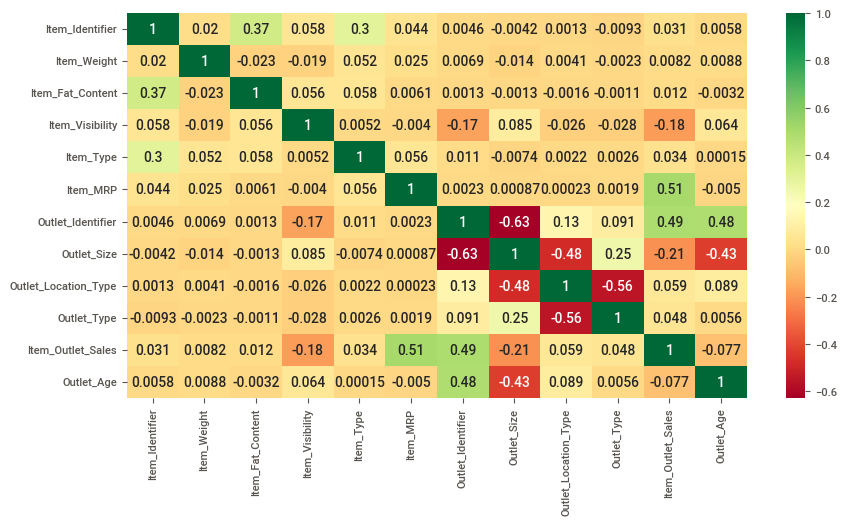

In [78]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(Big_Mart_df.corr(), cmap = "RdYlGn", annot = True)

In [79]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = Big_Mart_df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

Empty DataFrame
Columns: [feature1, feature2, corr]
Index: []

### Split the Data
* Separate the dataset into features (X) and the target variable (y), then divide into training and testing sets.

In [80]:
from sklearn.model_selection import train_test_split

# Define features and target
X = Big_Mart_df.drop(columns=['Item_Outlet_Sales'])
y = Big_Mart_df['Item_Outlet_Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training set shape:", y_train.shape)
print("Test set shape:", y_test.shape)


Training set shape: (6818, 11)
Test set shape: (1705, 11)
Training set shape: (6818,)
Test set shape: (1705,)


In [86]:
X_test.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
7503                2     0.340844                 0        -0.913837   
2957                1    -1.165821                 0         0.068376   
7031                2     0.388149                 1        -0.580243   
1084                0    -0.186051                 1        -0.504181   
856                 2    -0.630091                 1        -1.225801   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Size  \
7503         12 -0.988617                  8            0   
2957          8 -1.578319                  6            2   
7031         10 -1.588970                  7            1   
1084          7  0.525323                  9            1   
856           6  0.907611                  5            2   

      Outlet_Location_Type  Outlet_Type  Outlet_Age  
7503                     2            3    1.293934  
2957                     0            3    0.099372  
7031                     0            3   -0.139541  
1084                     2            1    1.532846  
856                      1            3   -0.736822

## Linear Regression :-

In [87]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Train R2:", (r2_score(y_train, y_pred_train))*100)
print("Linear Regression Test R2:", (r2_score(y_test, y_pred_test))*100)
print("Linear Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Linear Regression Train R2: 62.8548494754037
Linear Regression Test R2: 63.3937433181147
Linear Regression Test RMSE: 0.620369017252007


In [88]:
print("Model expected features:", lr_model.n_features_in_)

Model expected features: 11


## Random ForestRegressor :-

In [89]:
from sklearn.ensemble import RandomForestRegressor 
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Regression Train R2:", (r2_score(y_train, y_pred_train))*100)
print("Random Forest Regression Test R2:", (r2_score(y_test, y_pred_test))*100)
print("Random Forest Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Random Forest Regression Train R2: 95.82135847772079
Random Forest Regression Test R2: 71.48682504336028
Random Forest Regression Test RMSE: 0.5475140005934797


In [90]:
print("Model expected features:", rf_model.n_features_in_)

Model expected features: 11


## RandomForest Regression Hyperparameter Tuning

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
 

# Define parameter distribution
param_dist = {
     'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Best Parameters
print("Best parameters:", random_search.best_params_)

# Best Model
rbest_rf_model = random_search.best_estimator_

# Predictions with the best model
y_pred_rbest_train = rbest_rf_model.predict(X_train)
y_pred_rbest_test = rbest_rf_model.predict(X_test)

print("Best Random Forest Train R2:", (r2_score(y_train, y_pred_rbest_train))*100)
print("Best Random Forest Test R2:", (r2_score(y_test, y_pred_rbest_test))*100)
print("Best Random Forest Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rbest_test)))


Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best Random Forest Train R2: 79.10013851560116
Best Random Forest Test R2: 73.87231317561569
Best Random Forest Test RMSE: 0.5241105725516478


## Decision Tree Regression
 


In [93]:
from sklearn.tree import DecisionTreeRegressor
 

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Regression Train R2:", (r2_score(y_train, y_pred_train))*100)
print("Decision Tree Regression Test R2:", (r2_score(y_test, y_pred_test))*100)
print("Decision Tree Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Decision Tree Regression Train R2: 100.0
Decision Tree Regression Test R2: 44.380489327657315
Decision Tree Regression Test RMSE: 0.7646910751562846


## Decision Tree Regression Hyperparameter Tuning

In [95]:
 
# Define parameter grid
param_dist_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized Search
random_search_dt = RandomizedSearchCV(DecisionTreeRegressor(random_state=42),
                                      param_distributions=param_dist_dt,
                                      n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
random_search_dt.fit(X_train, y_train)

# Best Model
best_dt = random_search_dt.best_estimator_

# Predictions
y_trainpred_dt = best_dt.predict(X_train)
y_testpred_dt = best_dt.predict(X_test)


 

# Evaluation
print("Decision Tree Regression Train R2:", (r2_score(y_train, y_trainpred_dt))*100)
print("Decision Tree Regression Test R2:", r2_score(y_test, y_testpred_dt) * 100)
print("Decision Tree Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_testpred_dt)))


Decision Tree Regression Train R2: 73.68514583811003
Decision Tree Regression Test R2: 66.96842563418582
Decision Tree Regression RMSE: 0.5893008621799667


In [96]:
print("Model expected features:", best_dt.n_features_in_)

Model expected features: 11


## Gradient Boosting Regression (GBR)


In [97]:
from sklearn.ensemble import GradientBoostingRegressor
 

# Initialize and train the model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Predictions
y_pred_train = gbr_model.predict(X_train)
y_pred_test = gbr_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regression Train R2:", (r2_score(y_train, y_pred_train))*100)
print("Gradient Boosting Regression Test R2:", (r2_score(y_test, y_pred_test))*100)
print("Gradient Boosting Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Gradient Boosting Regression Train R2: 75.63271966483842
Gradient Boosting Regression Test R2: 74.3441533855071
Gradient Boosting Regression Test RMSE: 0.5193565519773555


## Gradient Boosting Regression (GBR) Hyperparameter Tuning

In [99]:

# Define parameter grid
param_dist_gbr = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Randomized Search
random_search_gbr = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),
                                       param_distributions=param_dist_gbr,
                                       n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
random_search_gbr.fit(X_train, y_train)

# Best Model
best_gbr = random_search_gbr.best_estimator_

# Predictions
y_trainpred_gbr = best_gbr.predict(X_train)
y_testpred_gbr = best_gbr.predict(X_test)

# Evaluation
print("GBR Train R2:", r2_score(y_train, y_trainpred_gbr) * 100)
print("GBR Test R2:", r2_score(y_test, y_testpred_gbr) * 100)
print("GBR RMSE:", np.sqrt(mean_squared_error(y_test, y_testpred_gbr)))

GBR Train R2: 75.70631167579135
GBR Test R2: 73.86011124139854
GBR RMSE: 0.5242329411388897


In [100]:
print("Model expected features:", best_gbr.n_features_in_)

Model expected features: 11


## XGBoost Regression

In [104]:
import xgboost as XGBRegressor
  

# Initialize and train the model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Regression Train R2:", (r2_score(y_train, y_pred_train))*100)
print("XGBoost Regression Test R2:", (r2_score(y_test, y_pred_test))*100)
print("XGBoost Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


XGBoost Regression Train R2: 88.88598482496504
XGBoost Regression Test R2: 71.02770785344929
XGBoost Regression Test RMSE: 0.5519044141020936


## XGBoost Regression Hyperparameter Tuning

In [106]:
from xgboost import XGBRegressor

# Define parameter grid
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized Search
random_search_xgb = RandomizedSearchCV(XGBRegressor(random_state=42),
                                       param_distributions=param_dist_xgb,
                                       n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
random_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = random_search_xgb.best_estimator_

# Predications
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model
 
print("XGBoost Regression Train R2:", r2_score(y_train, y_train_pred_xgb) * 100)
print("XGBoost Regression Test R2:", r2_score(y_test, y_test_pred_xgb) * 100)
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)))



XGBoost Regression Train R2: 74.37240527815588
XGBoost Regression Test R2: 74.33246177641473
XGBoost RMSE: 0.5194748763159427


## LightGBM Regression

In [108]:
import lightgbm as lgb
 
# Initialize and train the model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_train = lgb_model.predict(X_train)
y_pred_test = lgb_model.predict(X_test)

# Evaluate the model
print("LightGBM Regression Train R2:", (r2_score(y_train, y_pred_train))*100)
print("LightGBM Regression Test R2:", (r2_score(y_test, y_pred_test))*100)
print("LightGBM Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 7.309469
LightGBM Regression Train R2: 80.47336399344424
LightGBM Regression Test R2: 73.98632889143117
LightGBM Regression Test RMSE: 0.5229657682547192


## LightGBM Regression Hyperparameter Tuning

In [109]:
from lightgbm import LGBMRegressor

# Define parameter grid
param_dist_lgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 3, 5, 10],
    'num_leaves': [20, 31, 40, 50]
}

# Randomized Search
random_search_lgb = RandomizedSearchCV(LGBMRegressor(random_state=42),
                                       param_distributions=param_dist_lgb,
                                       n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
random_search_lgb.fit(X_train, y_train)

# Best Model
best_lgb = random_search_lgb.best_estimator_

# Predictions

y_train_pred_lgb = best_lgb.predict(X_train)
y_test_pred_lgb = best_lgb.predict(X_test)

# Evaluate the model

print("LightGBM Regression Train R2:", r2_score(y_train, y_train_pred_lgb) * 100)
print("LightGBM Regression Test R2:", r2_score(y_test, y_test_pred_lgb) * 100)
print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_lgb)))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 4545, number of used features: 11
[LightGBM] [Info] Start training from score 7.319524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 4545, number of used features: 11
[LightGBM] [Info] Start training from score 7.309201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 4546, number of used features: 11
[LightGBM] [Info] Start training from score 7.299685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 4545, number of used features: 11
[LightGBM] [Info] Start training from score 7.319524
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 4545, number of used features: 11
[LightGBM] [Info] Start training from score 7.309201
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tot

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 4545, number of used features: 11
[LightGBM] [Info] Start training from score 7.309201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 4545, number of used features: 11
[LightGBM] [Info] Start training from score 7.319524
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 4545, number of used features: 11
[LightGBM] [In

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LightGBM Regression Train R2: 74.50904765234664
LightGBM Regression Test R2: 74.47039605315935
LightGBM RMSE: 0.5180771981584011


## CatBoost Regression

In [ ]:
!pip install catboost


In [110]:
from catboost import CatBoostRegressor
 

# Initialize and train the model
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Predictions
y_pred_train = catboost_model.predict(X_train)
y_pred_test = catboost_model.predict(X_test)

# Evaluate the model
print("CatBoost Regression Train R2:", (r2_score(y_train, y_pred_train))*100)
print("CatBoost Regression Test R2:", (r2_score(y_test, y_pred_test))*100)
print("CatBoost Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


CatBoost Regression Train R2: 87.09167084355548
CatBoost Regression Test R2: 72.53201937991373
CatBoost Regression Test RMSE: 0.5373853290892506


## CatBoost Regression Hyperparameter Tuning

In [111]:
from catboost import CatBoostRegressor

# Define parameter grid
param_dist_cat = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 10]
}

# Randomized Search
random_search_cat = RandomizedSearchCV(CatBoostRegressor(verbose=0, random_state=42),
                                       param_distributions=param_dist_cat,
                                       n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
random_search_cat.fit(X_train, y_train)


# Best Model
best_cat = random_search_cat.best_estimator_

# Predications
y_train_pred_cat = best_cat.predict(X_train)
y_test_pred_cat = best_cat.predict(X_test)

# Evaluate the model

print("CatBoost Regression Train R2:", r2_score(y_train, y_train_pred_cat) * 100)
print("CatBoost Regression Test R2:", r2_score(y_test, y_test_pred_cat) * 100)
print("CatBoost Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_cat)))



CatBoost Regression Train R2: 74.79948830068348
CatBoost Regression Train R2: 74.84944578048051
CatBoost Regression Test RMSE: 0.5142167503408566


## Support Vector Regression (SVR)

In [112]:
from sklearn.svm import SVR
 

# Initialize and train the model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predictions
y_pred_train = svr_model.predict(X_train)
y_pred_test = svr_model.predict(X_test)

# Evaluate the model
print("SVR Train R2:", (r2_score(y_train, y_pred_train))*100)
print("SVR Test R2:", (r2_score(y_test, y_pred_test))*100)
print("SVR Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


SVR Train R2: 72.66921091403975
SVR Test R2: 73.12413972440635
SVR Test RMSE: 0.5315616329746489


## Support Vector Regression (SVR) Hyperparameter Tuning

In [113]:
from sklearn.svm import SVR

# Define parameter grid
param_dist_svr = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Randomized Search
random_search_svr = RandomizedSearchCV(SVR(),
                                       param_distributions=param_dist_svr,
                                       n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
random_search_svr.fit(X_train, y_train)

# Best model
best_svr = random_search_svr.best_estimator_

# predictions
y_train_pred_svr = best_svr.predict(X_train)
y_test_pred_svr = best_svr.predict(X_test)
 

# Evaluate the model
print("SVR Train R2:", r2_score(y_train, y_train_pred_svr) * 100)
print("SVR Test R2:", r2_score(y_test, y_test_pred_svr) * 100)
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_svr)))


SVR Train R2: 73.7799944965028
SVR Test R2: 73.91884346865812
SVR RMSE: 0.5236436753869105


## Artificial Neural Networks (ANNs) for Regression:-

In [114]:
from sklearn.neural_network import MLPRegressor
 

# Initialize and train the model
ann_model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Predictions
y_pred_train = ann_model.predict(X_train)
y_pred_test = ann_model.predict(X_test)

# Evaluate the model
print("ANN Train R2:", (r2_score(y_train, y_pred_train))*100)
print("ANN Test R2:", (r2_score(y_test, y_pred_test))*100)
print("ANN Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


ANN Train R2: 74.27062793131032
ANN Test R2: 73.79285225708205
ANN Test RMSE: 0.5249069440712849


## Artificial Neural Networks (ANNs) for Regression Hyperparameter Tuning

In [115]:
import tensorflow as tf
from tensorflow import keras
 
# Define model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predictions
y_train_pred_ann = model.predict(X_train).flatten()
y_test_pred_ann = model.predict(X_test).flatten()

# Evaluate the model
print("ANN Regression Train R2:", r2_score(y_train, y_train_pred_ann) * 100)
print("ANN Regression Test R2:", r2_score(y_test, y_test_pred_ann) * 100)
print("ANN Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_ann)))

Epoch 1/100
214/214 [==============================] - 4s 9ms/step - loss: 1.6273 - mae: 0.7564 - val_loss: 0.4629 - val_mae: 0.5147
Epoch 2/100
214/214 [==============================] - 1s 5ms/step - loss: 0.3691 - mae: 0.4755 - val_loss: 0.3285 - val_mae: 0.4578
Epoch 3/100
214/214 [==============================] - 1s 5ms/step - loss: 0.3799 - mae: 0.4830 - val_loss: 0.3195 - val_mae: 0.4384
Epoch 4/100
214/214 [==============================] - 1s 5ms/step - loss: 0.3300 - mae: 0.4487 - val_loss: 0.2898 - val_mae: 0.4174
Epoch 5/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3237 - mae: 0.4463 - val_loss: 0.3217 - val_mae: 0.4271
Epoch 6/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3253 - mae: 0.4462 - val_loss: 0.4760 - val_mae: 0.5279
Epoch 7/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3240 - mae: 0.4467 - val_loss: 0.2801 - val_mae: 0.4120
Epoch 8/100
214/214 [==============================] - 1s 4ms/step - 

214/214 [==============================] - 1s 4ms/step - loss: 0.2849 - mae: 0.4152 - val_loss: 0.3279 - val_mae: 0.4262
Epoch 63/100
214/214 [==============================] - 1s 4ms/step - loss: 0.2840 - mae: 0.4126 - val_loss: 0.2691 - val_mae: 0.4038
Epoch 64/100
214/214 [==============================] - 1s 4ms/step - loss: 0.2815 - mae: 0.4101 - val_loss: 0.3675 - val_mae: 0.5090
Epoch 65/100
214/214 [==============================] - 1s 4ms/step - loss: 0.2852 - mae: 0.4168 - val_loss: 0.2801 - val_mae: 0.4016
Epoch 66/100
214/214 [==============================] - 1s 4ms/step - loss: 0.2795 - mae: 0.4114 - val_loss: 0.2773 - val_mae: 0.4129
Epoch 67/100
214/214 [==============================] - 1s 4ms/step - loss: 0.2869 - mae: 0.4154 - val_loss: 0.2803 - val_mae: 0.3977
Epoch 68/100
214/214 [==============================] - 1s 4ms/step - loss: 0.2868 - mae: 0.4159 - val_loss: 0.2701 - val_mae: 0.3981
Epoch 69/100
214/214 [==============================] - 1s 4ms/step - loss:

## Use of Ensemble and Boosting Algorithms

In [116]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define base learners (top-performing models)
base_learners = [
    ('gbr', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('lgbm', LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('cat', CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_state=42))
]

# Meta-model (final estimator)
meta_model = LinearRegression()

# Create Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

# Train the model
stacking_regressor.fit(X_train, y_train)

# Predictions
y_train_pred_stack = stacking_regressor.predict(X_train)
y_pred_stack = stacking_regressor.predict(X_test)

# Evaluation
print("Stacking Regressor Train R2:", r2_score(y_train, y_train_pred_stack) * 100)
print("Stacking Regressor Test R2:", r2_score(y_test, y_pred_stack) * 100)
print("Stacking Regressor Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack)))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 7.309469
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 11
[LightGBM] [Info] Start training from score 7.313842
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not 

In [120]:
from sklearn.ensemble import VotingRegressor

# Define base learners
base_learners = [
    ('gbr', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('lgbm', LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('cat', CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_state=42))
]

# Create Voting Regressor
voting_regressor = VotingRegressor(estimators=base_learners)

# Train the model
voting_regressor.fit(X_train, y_train)

# Predictions
y_pred_vote = voting_regressor.predict(X_test)

# Evaluation
print("Voting Regressor Test R2:", r2_score(y_test, y_pred_vote) * 100)
print("Voting Regressor Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_vote)))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 7.309469
Voting Regressor Test R2: 74.00131995031697
Voting Regressor Test RMSE: 0.5228150601829129


In [123]:
import pickle
  
# Save models
models = {
    "rbest_rf_model.pkl": rbest_rf_model,
    "gbr_model.pkl": gbr_model,
    "xgb_model.pkl": xgb_model,
    "lgb_model.pkl": lgb_model,
    "catboost_model.pkl": catboost_model,
    "ann_model.pkl": ann_model,
    "stacking_regressor.pkl": stacking_regressor,
    "voting_regressor.pkl": voting_regressor
}

for filename, model in models.items():
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    print(f"Model saved as {filename}")


Model saved as rbest_rf_model.pkl
Model saved as gbr_model.pkl
Model saved as xgb_model.pkl
Model saved as lgb_model.pkl
Model saved as catboost_model.pkl
Model saved as ann_model.pkl
Model saved as stacking_regressor.pkl
Model saved as voting_regressor.pkl


## Steps to Predict on Test CSV :-

In [81]:
import pandas as pd
Test_df = pd.read_csv(r"C:\Users\GANESH AHIRE\Documents\Projects\project\big_mart\test.csv")

In [82]:
Test_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [83]:
Test_df.shape

(5681, 11)

In [84]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### STATISTICAL MEASURES OF TEST DATA:-


In [85]:
Test_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

**Fix Item_Visibility Zeros**
* Replace zeros with the median of Item_Visibility for similar products.

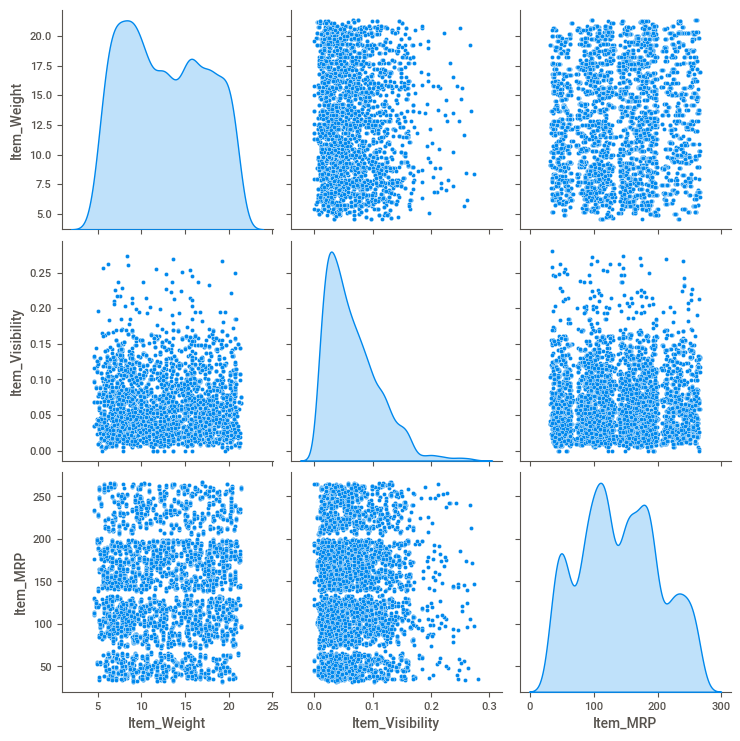

In [86]:
# Compute mean visibility per product category
visibility_mean = Test_df.groupby("Item_Identifier")["Item_Visibility"].transform("mean")

# Replace only the 0 values with the mean visibility
Test_df.loc[Test_df["Item_Visibility"] == 0, "Item_Visibility"] = visibility_mean

# Apply log transformation to normalize the distribution
Test_df["Item_Visibility"] = np.log1p(Test_df["Item_Visibility"])

# The pairplot
numerical_features = ["Item_Weight", "Item_Visibility", "Item_MRP"]
sns.pairplot(Test_df[numerical_features], diag_kind="kde")  # kde gives smoothed histograms
plt.show()

In [87]:
#Extracting information about a Catgorical data
Test_df.describe(include="O")

Item_Identifier Item_Fat_Content    Item_Type Outlet_Identifier  \
count             5681             5681         5681              5681   
unique            1543                5           16                10   
top              DRF48          Low Fat  Snack Foods            OUT027   
freq                 8             3396          789               624   

       Outlet_Size Outlet_Location_Type        Outlet_Type  
count         4075                 5681               5681  
unique           3                    3                  4  
top         Medium               Tier 3  Supermarket Type1  
freq          1862                 2233               3717


## DATA PREPROCESSING / FEATURE ENGINEERING :-

## 1. Check Missing Value :-


In [88]:
Test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [89]:
# Create function to check missing value with percentage
def missing_value(Data):
    null_value = Test_df.isnull().sum()
    percentage = (Test_df.isnull().sum()/Test_df.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing_Number','Missing_Percentage'])
    return null_value
missing_value(Test_df)

Missing_Number  Missing_Percentage
Item_Identifier                         0            0.000000
Item_Weight                           976           17.180074
Item_Fat_Content                        0            0.000000
Item_Visibility                         0            0.000000
Item_Type                               0            0.000000
Item_MRP                                0            0.000000
Outlet_Identifier                       0            0.000000
Outlet_Establishment_Year               0            0.000000
Outlet_Size                          1606           28.269671
Outlet_Location_Type                    0            0.000000
Outlet_Type                             0            0.000000

**Missing Values:-**
* Item_Weight: Missing values in 976 rows (~17% of data).
* Outlet_Size: Missing values in 1606 rows (~28% of data).

## 2. Impute Missing Value :-
1. Item_Weight :-


In [90]:
Test_df['Item_Identifier'].value_counts()

Item_Identifier
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
FDP15    8
FDK57    8
NCS41    8
NCW05    7
FDM12    7
FDI53    7
FDY32    7
FDE52    7
NCT53    7
NCM18    7
FDY09    7
FDU43    7
NCU29    7
FDC37    7
FDH52    7
DRC24    7
FDN50    7
FDC23    7
NCC55    7
FDF58    7
FDU48    7
FDY58    7
FDQ04    7
FDY43    7
FDG28    7
FDE39    7
FDW15    7
FDI36    7
DRM11    7
FDF28    7
NCV42    7
NCQ29    7
FDW58    7
FDR13    7
FDS08    7
FDT35    7
FDD22    7
FDL15    7
NCK31    7
FDR16    7
DRE01    7
DRL59    7
NCM42    7
NCV18    7
FDB47    7
FDE21    7
NCR42    7
NCX53    7
FDE38    7
FDD48    7
FDD45    6
NCP14    6
NCQ02    6
FDK46    6
FDV58    6
DRI59    6
FDL14    6
FDF17    6
NCC06    6
FDU09    6
FDN20    6
FDP21    6
NCC31    6
FDJ33    6
FDD20    6
FDT51    6
FDO51    6
FDG40    6
FDA38    6
FDH22    6
FDR40    6
FDV43    6
FDM09    6
NCT18    6
DRG25    6
FDT47    6
NCB07    6
NCL17    6
FDH08    6
FDA37    6
DRJ47    6
FDM38    6
FDF38    6
FDY08    6
FDU45

In [91]:
Test_df['Item_Identifier'] = Test_df['Item_Identifier'].apply(lambda x: x[:2])

In [92]:
Test_df['Item_Identifier'].value_counts()

Item_Identifier
FD    4076
NC    1087
DR     518
Name: count, dtype: int64

In [93]:
#For Item_Weight, use the mean or median of Item_Weight grouped by Item_Type for imputation:
Test_df['Item_Weight'] = Test_df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))


2. Outlet_Size :-

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Grocery Store'),
  Text(2, 0, 'Supermarket Type3'),
  Text(3, 0, 'Supermarket Type2')])

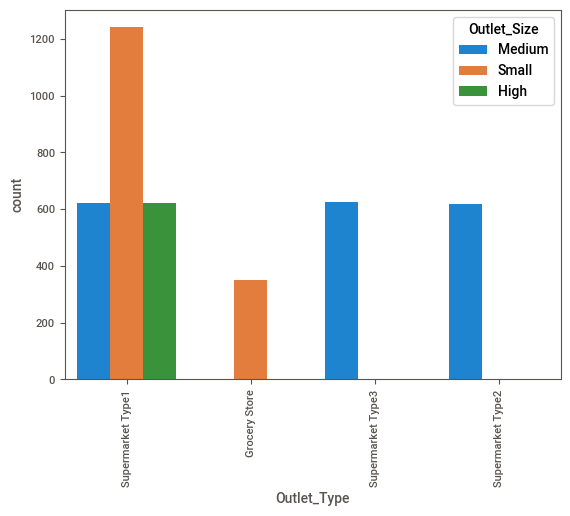

In [94]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE
sns.countplot(data = Test_df, x = "Outlet_Type",hue = "Outlet_Size")
plt.xticks(rotation =90)

In [95]:
# For Outlet_Size, impute missing values using the mode based on Outlet_Type:
Test_df['Outlet_Size'] = Test_df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

In [96]:
Test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## 3. Outlier  Handling :-
* Outliers are extreme values that deviate significantly from the majority of the data. Features with a large range compared to their interquartile range (IQR) often have outliers.


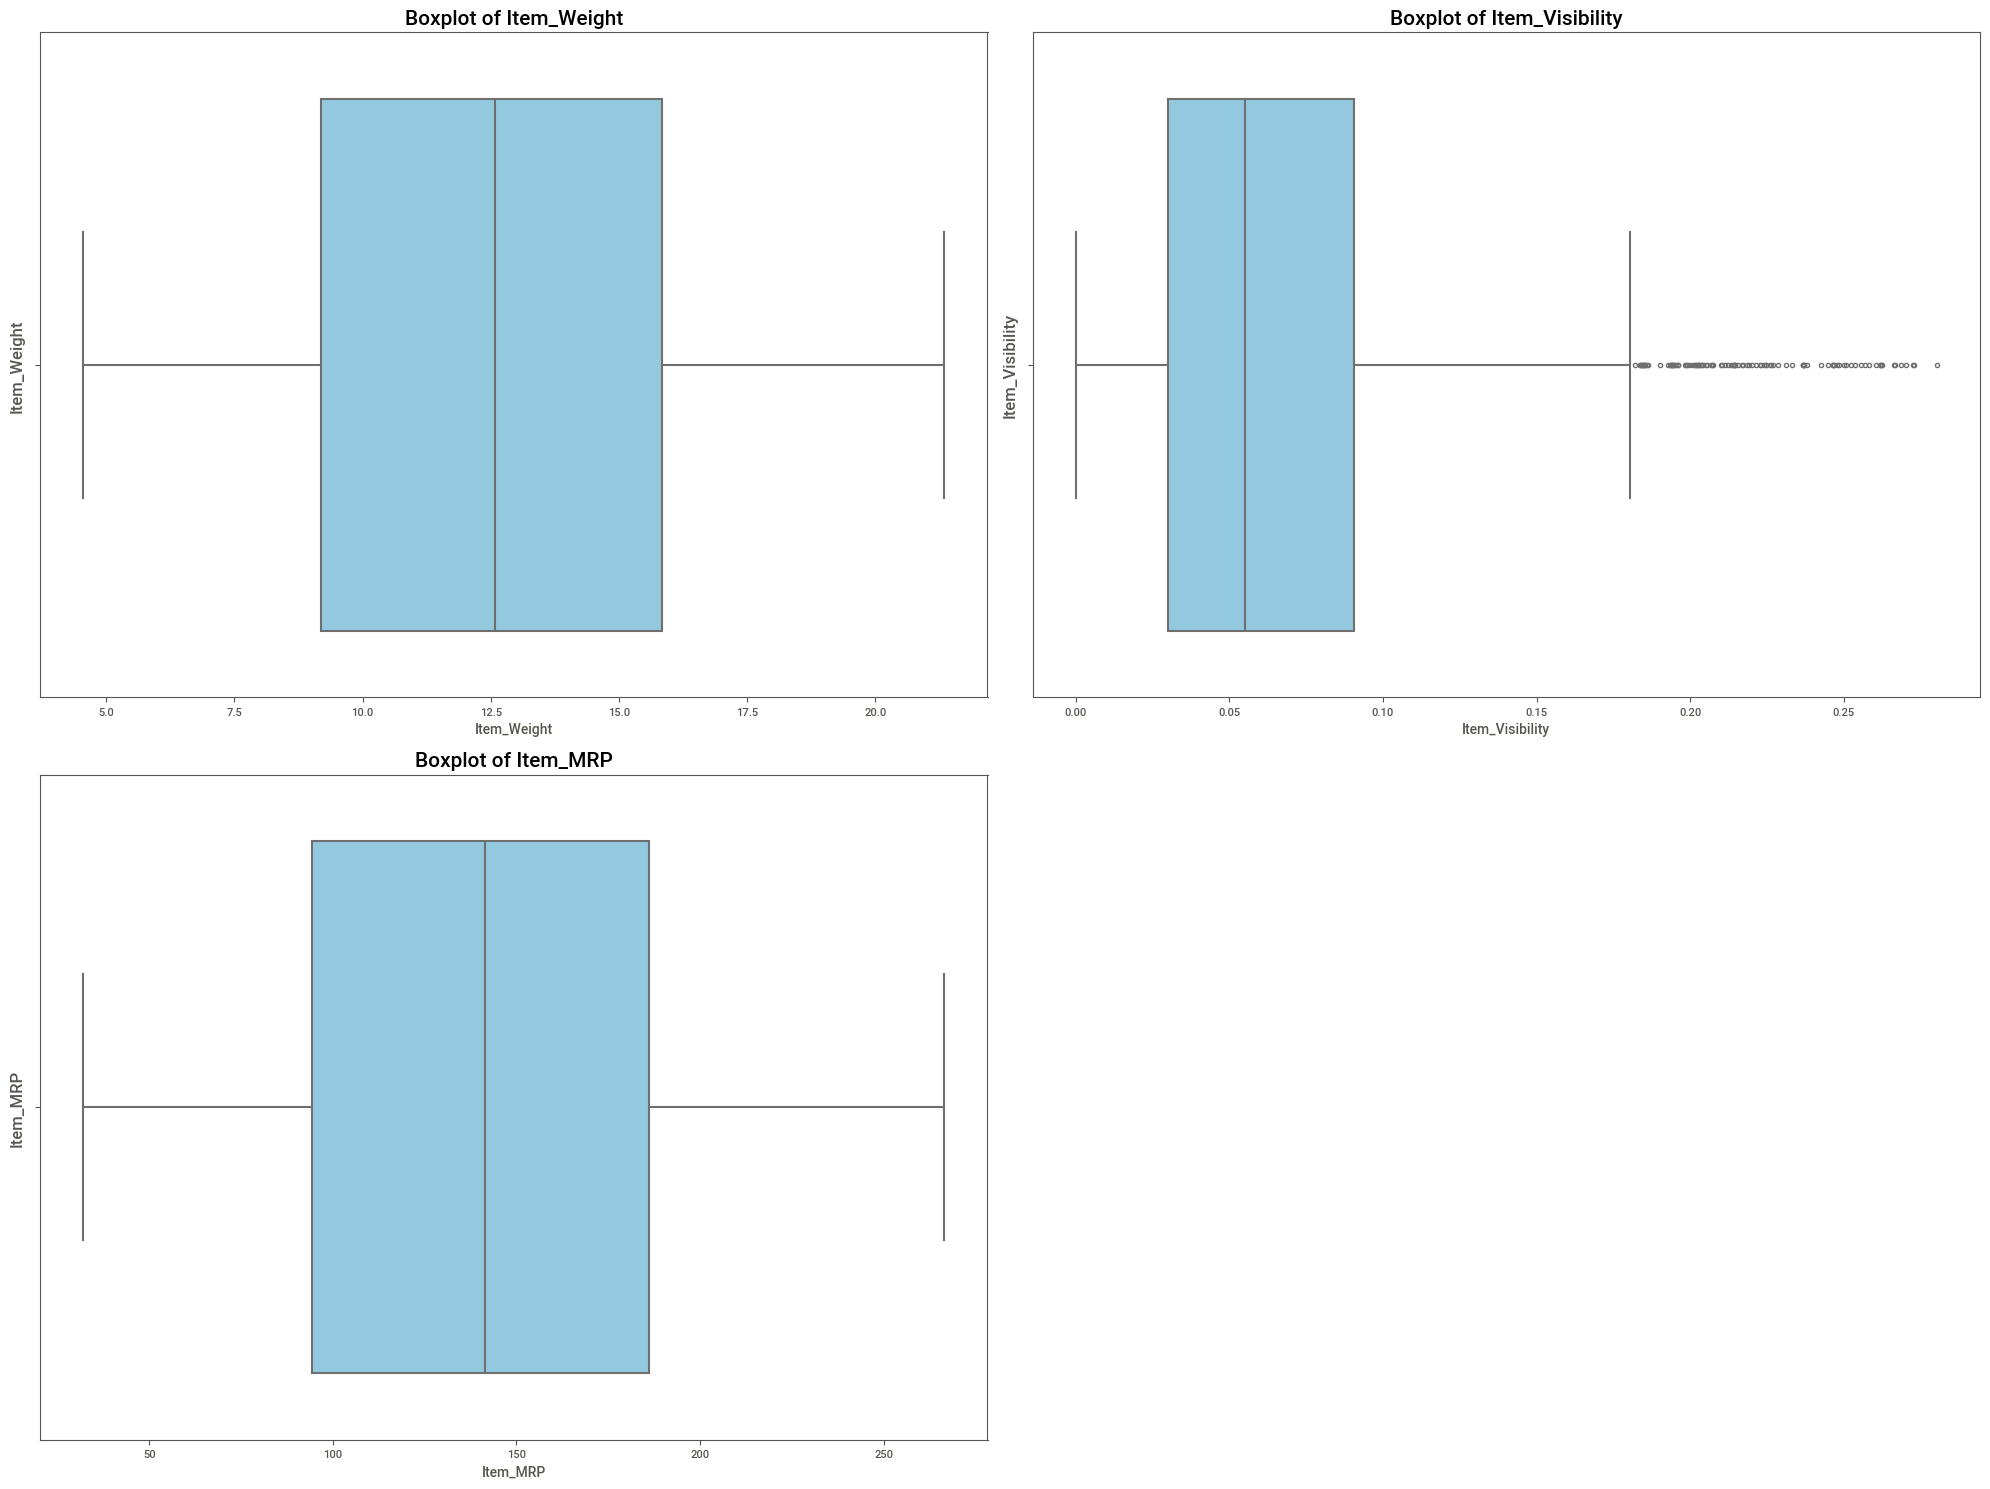

In [97]:
# Boxplot Function
def boxplot(df, continuous):
    plt.figure(figsize=(20, 15))  # Define canvas size
    plotno = 1  # Counter
    for column in continuous:
        if plotno <= 8:  # Ensure no extra plots
            plt.subplot(2, 2, plotno)  # plotting 4 graphs (2-rows,2-columns) ,plotnumber is for count
            sns.boxplot(x=column, data=df, color='skyblue', linewidth=1.5)
            plt.title(f'Boxplot of {column}', fontsize=15)
            plt.ylabel(column, fontsize=12)
        plotno += 1
    plt.tight_layout()
    plt.show()

# List of continuous variables
continuous = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Call the function
boxplot(Test_df, continuous)

**Features Likely to Have Outliers**
1. Item_Visibility:
    * Minimum value is 0 (implying missing or erroneous values).
    * Contains extreme values beyond 75th percentile (0.094).4

In [98]:
from scipy import stats
IQR = stats.iqr(Test_df.Item_Visibility,interpolation = 'midpoint')
IQR

## min and max limit calculation
# First quartile (Q1) 
Q1 = Test_df.Item_Visibility.quantile(0.25)
# Third quartile (Q3) 
Q3 =Test_df.Item_Visibility.quantile(0.75)
##getting the limits
min_limit= Q1 - 1.5*IQR
print('Minimum limit',min_limit)
max_limit= Q3 +1.5*IQR
print('Maximum limit',max_limit)


Minimum limit -0.06075201012180993
Maximum limit 0.18120561173931923


In [99]:
len(Test_df.loc[Test_df['Item_Visibility'] > max_limit])/18278*100


0.5854032169821644

In [100]:
# Filter or cap extreme outliers
Test_df['Item_Visibility'] = Test_df['Item_Visibility'].clip(lower=min_limit, upper=max_limit)


<Axes: xlabel='Item_Visibility'>

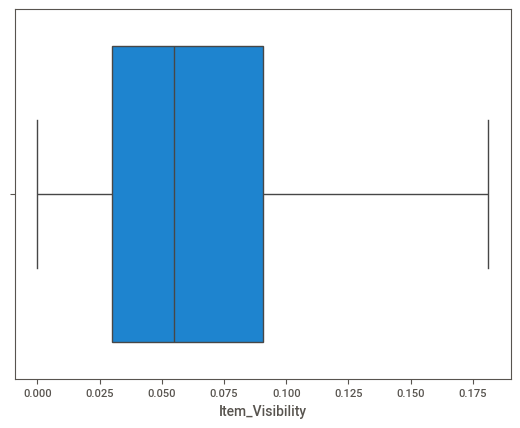

In [101]:
sns.boxplot(x = Test_df.Item_Visibility)

## 4. Handling Categorical Data :-
* dataset has categorical variables (Item_Fat_Content, Item_Type, Outlet_Size, etc.) that need to be converted into numerical formats for machine learning models.
* The Item_Fat_Content column contains various representations of the same categories which can lead to inconsistencies in data analysis like "Low Fat" vs. "low fat" and "Regular.









**Categorical Features:**
* Item_Identifier
* Item_Fat_Content
* Item_Type 
* Outlet_Identifier 
* Outlet_Size
* Outlet_Location_Type 
* Outlet_Type



1. Item_Identifier


In [102]:
Test_df.Item_Identifier=Test_df.Item_Identifier.map({'FD':2,'NC':1,'DR':0})
Test_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0                2    20.750000          Low Fat         0.007536   
1                2     8.300000              reg         0.037708   
2                1    14.600000          Low Fat         0.094924   
3                2     7.315000          Low Fat         0.015271   
4                2    12.591234          Regular         0.112077   

     Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0  Snack Foods  107.8622            OUT049                       1999   
1        Dairy   87.3198            OUT017                       2007   
2       Others  241.7538            OUT010                       1998   
3  Snack Foods  155.0340            OUT017                       2007   
4        Dairy  234.2300            OUT027                       1985   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 1  Supermarket Type1  
1       Small               Tier 2  Supermarket Type1  
2       Small               Tier 3      Grocery Store  
3       Small               Tier 2  Supermarket Type1  
4      Medium               Tier 3  Supermarket Type3

2. Item_Fat_Content

In [103]:
# Encode Categorical Variables
# Standardize categories in Item_Fat_Content
Test_df['Item_Fat_Content'] = Test_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [104]:
Test_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [105]:
Test_df.Item_Fat_Content = Test_df.Item_Fat_Content.map({'Low Fat':1,'Regular':0})
Test_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
1    3668
0    2013
Name: count, dtype: int64


3. Item_Type


In [106]:
Test_df['Item_Type'].value_counts()

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64

In [107]:
Test_df.Item_Type = Test_df.Item_Type.map({'Fruits and Vegetables':15,'Snack Foods':14,'Household':13,'Frozen Foods':12,
                                            'Dairy':11,'Canned':10,'Baking Goods':9,'Health and Hygiene':8,'Soft Drinks':7,'Meat':6,'Breads':5,'Hard Drinks':4,
                                            'Others':3,'Starchy Foods':2,'Breakfast':1,'Seafood':0})
Test_df['Item_Type'].value_counts()

Item_Type
14    789
15    781
13    638
12    570
11    454
9     438
10    435
8     338
6     311
7     281
5     165
4     148
2     121
3     111
1      76
0      25
Name: count, dtype: int64

4. Outlet_Identifier


In [108]:
Test_df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: count, dtype: int64

In [109]:
Test_df.Outlet_Identifier = Test_df.Outlet_Identifier.map({'OUT027':9,'OUT013':8,'OUT049':7,'OUT046':6,'OUT035':5,'OUT045':4,
                                            'OUT018':3,'OUT017':2,'OUT010':1,'OUT019':0})
Test_df['Outlet_Identifier'].value_counts()

Outlet_Identifier
9    624
8    621
7    620
6    620
5    620
4    619
3    618
2    617
1    370
0    352
Name: count, dtype: int64

5. Outlet_Size


In [110]:
Test_df['Outlet_Size'].value_counts()

Outlet_Size
Small     3198
Medium    1862
High       621
Name: count, dtype: int64

In [111]:
Test_df.Outlet_Size = Test_df.Outlet_Size.map({'Small':2,'Medium':1,'High':0})

Test_df['Outlet_Size'].value_counts()

Outlet_Size
2    3198
1    1862
0     621
Name: count, dtype: int64

6. Outlet_Location_Type


In [112]:
Test_df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: count, dtype: int64

In [113]:
Test_df.Outlet_Location_Type = Test_df.Outlet_Location_Type.map({'Tier 3':2,'Tier 2':1,'Tier 1':0})

Test_df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
2    2233
1    1856
0    1592
Name: count, dtype: int64

7. Outlet_Type

In [114]:
Test_df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64

In [115]:
Test_df.Outlet_Type = Test_df.Outlet_Type.map({'Supermarket Type1':3,'Grocery Store':2,'Supermarket Type3':1,'Supermarket Type2':0})

Test_df['Outlet_Type'].value_counts()

Outlet_Type
3    3717
2     722
1     624
0     618
Name: count, dtype: int64

**Create a new feature for Outlet Age.**

In [116]:
Test_df['Outlet_Age'] = 2024 - Test_df['Outlet_Establishment_Year']  # Replace 2024 with the current year
#Drop the original Outlet_Establishment_Year
Test_df = Test_df.drop(columns=['Outlet_Establishment_Year'])

## 5. Feature Scaling :-

In [117]:
# StandardScaler scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
Test_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']]=scale.fit_transform(Test_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']])


In [118]:
Test_df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0                2     1.896477                 1        -1.336954         14   
1                2    -1.034960                 0        -0.631194         11   
2                1     0.448418                 1         0.707186          3   
3                2    -1.266885                 1        -1.156023         14   
4                2    -0.024560                 0         1.108439         11   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0 -0.536555                  7            1                     0   
1 -0.868937                  2            2                     1   
2  1.629848                  1            2                     2   
3  0.226697                  2            2                     1   
4  1.508110                  9            1                     2   

   Outlet_Type  Outlet_Age  
0            3   -0.139891  
1            3   -1.095512  
2            2   -0.020438  
3            3   -1.095512  
4            1    1.532446

## 6. Duplicates Value :-


In [119]:
Test_df.duplicated().sum()

0

## Feature Selection :-
### Correlation

<Axes: >

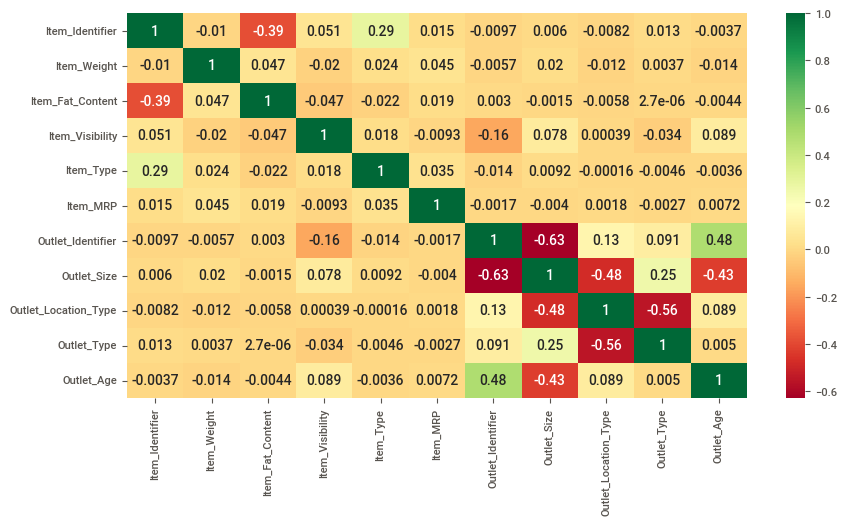

In [120]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(Test_df.corr(), cmap = "RdYlGn", annot = True)

In [121]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = Test_df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

Empty DataFrame
Columns: [feature1, feature2, corr]
Index: []

In [122]:
print("Train columns:", X_train.columns)
print("Test columns:", Test_df.columns)


Train columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Age'],
      dtype='object')
Test columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Age'],
      dtype='object')


In [123]:
X_train.shape

(6818, 11)

In [124]:
Test_df.shape

(5681, 11)

In [125]:
Test_df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0                2     1.896477                 1        -1.336954         14   
1                2    -1.034960                 0        -0.631194         11   
2                1     0.448418                 1         0.707186          3   
3                2    -1.266885                 1        -1.156023         14   
4                2    -0.024560                 0         1.108439         11   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0 -0.536555                  7            1                     0   
1 -0.868937                  2            2                     1   
2  1.629848                  1            2                     2   
3  0.226697                  2            2                     1   
4  1.508110                  9            1                     2   

   Outlet_Type  Outlet_Age  
0            3   -0.139891  
1            3   -1.095512  
2            2   -0.020438  
3            3   -1.095512  
4            1    1.532446

## Use the Model to Predict

In [128]:
import joblib

# Load trained models (make sure paths are correct)
xgb_model = joblib.load(r"C:\Users\GANESH AHIRE\Documents\Projects\project\big_mart\xgb_model.pkl")
 

# Make predictions using Gradient Boosting Regressor (GBR)
predictions = xgb_model.predict(Test_df)

# If log transformation was applied, reverse it
final_predictions = np.expm1(predictions)

# Print model and test dataset feature count
print("Model expected features:", xgb_model.n_features_in_)
print("Test dataset features:", Test_df.shape[1])


Model expected features: 11
Test dataset features: 11


## Save Predictions

In [129]:
Test_df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0                2     1.896477                 1        -1.336954         14   
1                2    -1.034960                 0        -0.631194         11   
2                1     0.448418                 1         0.707186          3   
3                2    -1.266885                 1        -1.156023         14   
4                2    -0.024560                 0         1.108439         11   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0 -0.536555                  7            1                     0   
1 -0.868937                  2            2                     1   
2  1.629848                  1            2                     2   
3  0.226697                  2            2                     1   
4  1.508110                  9            1                     2   

   Outlet_Type  Outlet_Age  
0            3   -0.139891  
1            3   -1.095512  
2            2   -0.020438  
3            3   -1.095512  
4            1    1.532446

In [130]:
# Save predictions to a CSV file
output = pd.DataFrame({'Item_Identifier': Test_df['Item_Identifier'], 'Item_Outlet_Sales': predictions})

output.to_csv('submission_1.csv', index=False)


In [131]:
print(output['Item_Outlet_Sales'].describe())


count    5681.000000
mean        7.299533
std         0.909461
min         3.199558
25%         6.825428
50%         7.535306
75%         7.944117
max         9.243372
Name: Item_Outlet_Sales, dtype: float64


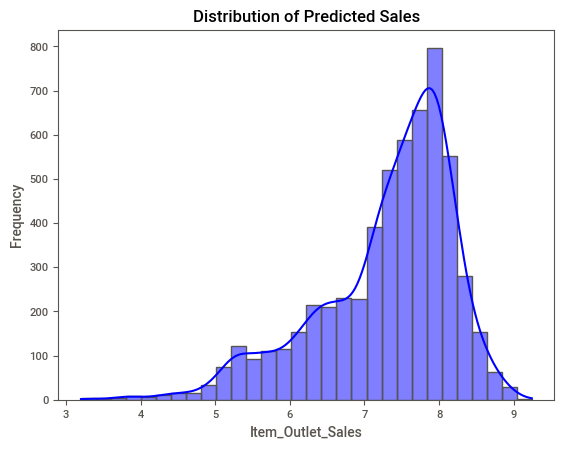

In [132]:
sns.histplot(output['Item_Outlet_Sales'], kde=True, bins=30, color='blue')
plt.title("Distribution of Predicted Sales")
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.show()


In [133]:
Submission_df = pd.read_csv("submission_1.csv")

In [134]:
Submission_df.head()

Item_Identifier  Item_Outlet_Sales
0                2           7.510846
1                2           6.992633
2                1           6.105834
3                2           7.624431
4                2           8.880876

In [135]:
Submission_df['Item_Outlet_Sales'] = np.expm1(Submission_df['Item_Outlet_Sales'])

In [136]:
Submission_df.head()

Item_Identifier  Item_Outlet_Sales
0                2        1826.758625
1                2        1087.584274
2                1         447.466282
3                2        2046.614426
4                2        7192.089123